# Section 1 - Introduction

This project is done by Tong Fu, Siyu Zhao, and Zejia Cai.


In this project, we will process, analyze, and model the data of TED talks.


##   Dataset introduction


> In this TED talk analysis, we mainly used a ted talk dataset scraped on 24-JUN-20 from TED.com and https://www.kaggle.com/thegupta/ted-talk. This dataset contains 4609 rows and 52 columns where each row represents an individual talk and each column details informatin like speaker, transcript, and other related attributes for the corresponding talk. We also scraped a Wikipedia page to get speaker's own wikipedia page and join it with the original dataframe.

> In the later part of this notebook, since we don't have rating column in this main dataset, we had it merged with another talk dataset that has rating feature included and contains 2550 rows and 17 features. However, we did not use the joined dataframe for machine learning due to not having sufficient rows.



##   Features introduction 


> There are a total of 52 features included in the original main datset. (including the ones we drop afterwards)




*   talk__id:  unique ID of the talk
*   talk_name: name of the talk
*   talk_description: short description of the talk
*   view_count: number of times the talk is viewed
*   comment_count: number of comments of the the talk
*   duration: time duration of the talk (seconds)
*   transcript: transcript of the talk
*   video_type_name: type of the talk (TEDx, TED Stage, etc.)
*   event: TED event of the talk (TED-ED, etc.)
*   number_of_speaker: number of speakers in the talk
*   speaker_id: unique ID of the primary speaker of the talk
*   speaker_name: name of the primary speaker
*   speaker_description: job of the primary speaker
*   speaker__who_he_is: detailed description of the primary speaker
*   speaker__why_listen: reason given on TED.com to listen to the primary speaker
*   speaker__what_others_say: what others say about the primary speaker
*   speaker__is_published: is the primary speaker published (1 for published)
*   all_speakers_details: detailed information for all speakers
*   is_talk_featured: is the talk featured (1 for featured)
*   has_talk_citation: does the talk has citation (1 for has citation)
*   recording_date: recording date of the talk
*   published_timestamp: publishing date and time of the talk
*   talks__tags: related tags of the talk
*   number_of__tags: number of related tags
*   language: language of the talk
*   native_language: native language of the talk
*   language_swap: can language be swapped (1 for yes)
*   is_subtitle_required: is subtitle required to watch the Talk (1 for yes)
*   url__webpage: URL of the Talk on TED.com
*   url__audio: URL to download audio of the talk
*   url__video: URL to download video of the talk
*   url__photo__talk: URL to download poster of the talk
*   url__photo__speaker: URL to download poster of primary speaker
*   url__subtitled_videos: URLs to download subtitled talk video in different languages
*   number_of__subtitled_videos: number of URLS that can download foreign language talk videos
*   number_of__talk__download_languages: number of different languages version of transcript and subtitled talk videos
*   talk__more_resources: details on other resources related
*   number_of__talk__more_resources: number of resouces related
*   talk__recommendations__blurb: recommendations on the talk
*   number_of__talk__recommendations: number of recommendations
*   related_talks: details of related or similar talks
*   number_of__related_talks: number of related talks
*   intro_duration: duration of introduction of the talk (0 / 11.8)
*   ad_duration: duration of pre advertisement in the talk
*   post_ad_duration: duration of post advertisement in the talk
*   external__duration: not sure
*   external__start_time: not sure
*   talks__player_talks__resources__h264__00__bitrate: not sure
*   talks__take_action: actions to take on the talk
*   number_of__talks__take_actions: number of actions that can take


## Why interesting and our goal



> Studying TED Talks, one of the most informative and influential shows in the world, helps us better understand what kinds of presentations are powerful and fun when spreading ideas. We are interested in finding out the similarity of the transcript or other attributes for these well-liked ted talks and we want to figure out the key features to predict popular talks. 

> Our project will do a lot of work on exploratory data analysis and NLP to show how each feature is related to the popular talks and the common points between these talks. At the later part of our project, we will focus on various kind of machine learning algorithms. We will also merge our original dataframe with other dataset that include extra columns and scrap wikipedia pages of the primary speakers to try to add new features to our model. Our final goal is to build the model that can efficently predict whether a talk is has a great number of views. 







# Section 2 - Data Loading and Preprocessing

> In this section, we are going to preprocess the data. First, we load the `TED_Talk.csv` file downloaded from Kaggle. This is the **main dataset** we will be working on. We also download another dataset called `ted_main.csv` from Kaggle, which includes the ratings information of the ted talks. 

> Next, we will perform some data cleaning on the main dataset, by dropping the columns that don't seem to be useful or informative at first glance, columns that are ambiguous, and columns with a lot null values. We also rename the column names so that it is more consistent.

## Load the data

In [ ]:
!pip3 install pandas==1.0.5

     |████████████████████████████████| 10.1MB 5.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.0.5 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
import pandas as pd
print(pd.__version__ == '1.0.5')

True


In [ ]:
 ! pip install -q kaggle
 from google.colab import files
 files.upload()
 ! mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/
 ! chmod 600 ~/.kaggle/kaggle.json
 ! kaggle datasets download -d 'thegupta/ted-talk'
#  ! mkdir ted-dataset
#  ! unzip ted-dataset.zip -d ted-dataset

Saving kaggle.json to kaggle.json
 34% 9.00M/26.8M [00:00<00:00, 34.0MB/s]
100% 26.8M/26.8M [00:00<00:00, 77.1MB/s]


In [ ]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26818 sha256=85f5676bc54f068b276f9f1e8a03d9af9c47993723ef400afa1ce08c77333a2b
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats
import matplotlib.pyplot as plt
import ast
import seaborn as sns
import json
import pandasql as ps

from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS, get_single_color_func,ImageColorGenerator

from google_drive_downloader import GoogleDriveDownloader as gdd
from PIL import Image


gdd.download_file_from_google_drive(file_id = '1PeQ5yyPaAUz4P5UdD8ET1TI7sOh5rHrj', dest_path = '/content/font.ttf')
gdd.download_file_from_google_drive(file_id = '1Ux7xGZonrX1TAv_BIHurTG1RxDzBVLP3', dest_path = '/content/mask.png')
gdd.download_file_from_google_drive(file_id ='1ADfrmZa_J9F5WBYbIpaTjzzmC2YnWW-S',dest_path = '/content/mask2.png')
gdd.download_file_from_google_drive(file_id ='1QLNaqN70k4SyBq2MZD5vG-Na05MAt2D4',dest_path = '/content/mask3.png')

In [ ]:
 ! unzip ted-talk.zip -d ted-dataset

Archive:  ted-talk.zip
  inflating: ted-dataset/TED_Talk.csv  


In [ ]:
 ! cp kaggle.json ~/.kaggle/
 ! chmod 600 ~/.kaggle/kaggle.json
 ! kaggle datasets download -d 'rounakbanik/ted-talks'

 42% 5.00M/12.0M [00:00<00:00, 49.8MB/s]
100% 12.0M/12.0M [00:00<00:00, 76.8MB/s]


In [ ]:
 ! unzip ted-talks.zip -d ted-dataset

Archive:  ted-talks.zip
  inflating: ted-dataset/ted_main.csv  
  inflating: ted-dataset/transcripts.csv  


## Data Cleaning

In [ ]:
# load the data
orig_df= pd.read_csv('/content/ted-dataset/TED_Talk.csv')
orig_df

,talk__id,talk__name,talk__description,view_count,comment_count,duration,transcript,video_type_name,event,number_of__speakers,speaker__id,speaker__name,speaker__description,speaker__who_he_is,speaker__why_listen,speaker__what_others_say,speaker__is_published,all_speakers_details,is_talk_featured,has_talk_citation,recording_date,published_timestamp,talks__tags,number_of__tags,language,native_language,language_swap,is_subtitle_required,url__webpage,url__audio,url__video,url__photo__talk,url__photo__speaker,url__subtitled_videos,number_of__subtitled_videos,talk__download_languages,number_of__talk__download_languages,talk__more_resources,number_of__talk__more_resources,talk__recommendations__blurb,talk__recommendations,number_of__talk__recommendations,related_talks,number_of__related_talks,intro_duration,ad_duration,post_ad_duration,external__duration,external__start_time,talks__player_talks__resources__h264__00__bitrate,talks__take_action,number_of__talks__take_actions
0,66,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,65678748,4952.0,1164,Good morning. How are you?(Audience) Good.It's...,TED Stage Talk,TED2006,1,69.0,Sir Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,1.0,"[{'id': '69', 'slug': 'sir_ken_robinson', 'is_...",True,0.0,2006-02-25,2006-06-27 00:11:00,"['children', 'creativity', 'culture', 'dance',...",7,en,en,False,False,https://www.ted.com/talks/sir_ken_robinson_do_...,https://download.ted.com/talks/SirKenRobinson_...,{'low': 'https://download.ted.com/talks/SirKen...,https://pe.tedcdn.com/images/ted/6b6eb940bceab...,https://pe.tedcdn.com/images/ted/1465_254x191.jpg,"{'de': {'name': 'German', 'low': 'https://down...",61,"[{'languageName': 'Portuguese, Brazilian', 'en...",62,"[{'status': 'approved', 'headline': '*You, You...",3,The education expert has a lot to say about th...,"[{'title': 'Reading list', 'description': '', ...",1,"[{'id': '865', 'hero': 'https://pe.tedcdn.com/...",6,11.82,3.33,0.83,1204.0,0.0,180.0,[],0
1,2405,This is what happens when you reply to spam email,"Suspicious emails: unclaimed insurance bonds, ...",59725446,288.0,588,"A few years ago, I got one of those spam email...",TED Stage Talk,TEDGlobal>Geneva,1,2664.0,James Veitch,Comedian and writer,"For James Veitch, a British writer and comedia...","Packed full of Nigerian princes, can't-miss in...","Sick of receiving so much spam, Veitch took ma...",1.0,"[{'id': '2664', 'slug': 'james_veitch', 'is_pu...",True,0.0,2015-12-08,2016-01-08 16:03:40,"['comedy', 'curiosity', 'communication', 'humo...",5,en,en,False,False,https://www.ted.com/talks/james_veitch_this_is...,https://download.ted.com/talks/JamesVeitch_201...,{'low': 'https://download.ted.com/talks/JamesV...,https://s3.amazonaws.com/talkstar-photos/uploa...,https://pe.tedcdn.com/images/ted/912867c2167fe...,"{'sv': {'name': 'Swedish', 'low': 'https://dow...",47,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",47,"[{'status': 'approved', 'headline': '*Dot Con:...",1,NaN,NaN,0,"[{'id': '2236', 'hero': 'https://pe.tedcdn.com...",6,11.82,3.33,0.83,589.0,0.0,180.0,[],0
2,1569,Your body language may shape who you are,(NOTE: Some of the findings presented in this ...,57734063,2649.0,1262,So I want to start by offering you a free no-t...,TED Stage Talk,TEDGlobal 2012,1,1284.0,Amy Cuddy,Social psychologist,Amy Cuddy’s research on body language reveals ...,Amy Cuddy wasn’t supposed to become a successf...,"Using a few simple tweaks to body language, Ha...",1.0,"[{'id': '1284', 'slug': 'amy_cuddy', 'is_publi...",True,0.0,2012-06-26,2012-10-01 15:00:08,"['body language', 'brain', 'business', 'psycho...",7,en,en,False,False,https://www.ted.com/talks/amy_cuddy_your_body_...,https://download.ted.com/talks/AmyCuddy_2012G....,{'low': 'https://download.ted.com/talks/AmyCud...,https://s3.amazonaws.com/talkstar-photos/uploa...,https://pe.tedcdn.com/images/ted/4f8fc6f1e41fa...,"{'ja': {'name':

Print out the types of all columns.

In [ ]:
orig_df.dtypes

talk__id                                               int64
talk__name                                            object
talk__description                                     object
view_count                                             int64
comment_count                                        float64
duration                                               int64
transcript                                            object
video_type_name                                       object
event                                                 object
number_of__speakers                                    int64
speaker__id                                          float64
speaker__name                                         object
speaker__description                                  object
speaker__who_he_is                                    object
speaker__why_listen                                   object
speaker__what_others_say                              object
speaker__is_published   

Here, we call the `isnull().sum()` function to see how many null values are in each column so that we can drop the ones that have too many nulls. We keep some of the columns with many nulls, such as speaker__what_others_say, because it might be useful in EDA. Also, although some of the columns seem to have zero nulls, we still drop them, such as number_of__talk__recommendations. This is because the talk__recommendations has thousands of nulls, but in number_of__talk__recommendations, the dataset treats the nulls as "0", which is not reasonable.

The ones we will drop here and reasons are:
* url__webpage: not informative
* url__audio: not informative
* url__video: not informative
* url__photo__talk: not informative
* url__photo__speaker: not informative
* url__subtitled_videos: not informative
* talks__take_action: ambiguous meaning
* number_of__talks__take_actions: ambiguous meaning
* external__duration: ambiguous meaning
* external__start_time: ambiguous meaning
* language_swap: ambiguous meaning
* all_speakers_details: redundant information
* talk__more_resources: too many nulls
* number_of__talk__more_resources: too many nulls
* talk__recommendations: too many nulls
* number_of__talk__recommendations: too many nulls
* talk__recommendations__blurb: ambiguous meaning

In [ ]:
# check nulls in each column and drop ones that have too many nulls
orig_df.isnull().sum()

talk__id                                                0
talk__name                                              0
talk__description                                       0
view_count                                              0
comment_count                                        1144
duration                                                0
transcript                                            518
video_type_name                                         0
event                                                   0
number_of__speakers                                     0
speaker__id                                            11
speaker__name                                           1
speaker__description                                  616
speaker__who_he_is                                    550
speaker__why_listen                                  1020
speaker__what_others_say                             3230
speaker__is_published                                  11
all_speakers_d

Drop the unuseful columns.

In [ ]:
# drop columns that have no actual meaning, ambiguous columns,  redundant columns, and contain too much nulls
columns_to_drop = ['url__webpage','url__audio','url__video',
                   'url__photo__talk','url__photo__speaker','talks__take_action',
                   'url__subtitled_videos', 'external__duration',
                   'external__start_time','number_of__talks__take_actions','language_swap',
                   'all_speakers_details','talk__more_resources','talk__recommendations','talk__recommendations__blurb',
                   'number_of__talk__more_resources', 'number_of__talk__recommendations']
df = orig_df.drop(columns=columns_to_drop)

Next, we process the name of the columns by changing double undescores to single underscore so that it's cleaner. Also set the talk_id as index, because each talk has its unique id. Speaker or talk names are not used here as index, because there could be talks or people with same names (though in this dataset it's pretty rare).

In [ ]:
# delete double underscore in column names
column_name_change = [col if '__' not in col else col.replace('__','_') for col in df.columns ]
df.columns = column_name_change
# set talk_id as index
df = df.set_index('talk_id')
df.head()

,talk_name,talk_description,view_count,comment_count,duration,transcript,video_type_name,event,number_of_speakers,speaker_id,speaker_name,speaker_description,speaker_who_he_is,speaker_why_listen,speaker_what_others_say,speaker_is_published,is_talk_featured,has_talk_citation,recording_date,published_timestamp,talks_tags,number_of_tags,language,native_language,is_subtitle_required,number_of_subtitled_videos,talk_download_languages,number_of_talk_download_languages,related_talks,number_of_related_talks,intro_duration,ad_duration,post_ad_duration,talks_player_talks_resources_h264_00_bitrate
talk_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
66,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,65678748,4952.0,1164,Good morning. How are you?(Audience) Good.It's...,TED Stage Talk,TED2006,1,69.0,Sir Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,1.0,True,0.0,2006-02-25,2006-06-27 00:11:00,"['children', 'creativity', 'culture', 'dance',...",7,en,en,False,61,"[{'languageName': 'Portuguese, Brazilian', 'en...",62,"[{'id': '865', 'hero': 'https://pe.tedcdn.com/...",6,11.82,3.33,0.83,180.0
2405,This is what happens when you reply to spam email,"Suspicious emails: unclaimed insurance bonds, ...",59725446,288.0,588,"A few years ago, I got one of those spam email...",TED Stage Talk,TEDGlobal>Geneva,1,2664.0,James Veitch,Comedian and writer,"For James Veitch, a British writer and comedia...","Packed full of Nigerian princes, can't-miss in...","Sick of receiving so much spam, Veitch took ma...",1.0,True,0.0,2015-12-08,2016-01-08 16:03:40,"['comedy', 'curiosity', 'communication', 'humo...",5,en,en,False,47,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",47,"[{'id': '2236', 'hero': 'https://pe.tedcdn.com...",6,11.82,3.33,0.83,180.0
1569,Your body language may shape who you are,(NOTE: Some of the findings presented in this ...,57734063,2649.0,1262,So I want to start by offering you a free no-t...,TED Stage Talk,TEDGlobal 2012,1,1284.0,Amy Cuddy,Social psychologist,Amy Cuddy’s research on body language reveals ...,Amy Cuddy wasn’t supposed to become a successf...,"Using a few simple tweaks to body language, Ha...",1.0,True,0.0,2012-06-26,2012-10-01 15:00:08,"['body language', 'brain', 'business', 'psycho...",7,en,en,False,50,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",51,"[{'id': '1042', 'hero': 'https://pe.tedcdn.com...",6,11.82,3.33,0.83,180.0
848,How great leaders inspire action,Simon Sinek has a simple but powerful model fo...,50494918,2093.0,1084,How do you explain when things don't go as we ...,TEDx Talk,TEDxPuget Sound,1,703.0,Simon Sinek,Leadership expert,Simon Sinek explores how leaders can inspire c...,Fascinated by the leaders who make impact in t...,NaN,1.0,True,0.0,2009-09-17,2010-05-04 09:31:00,"['TEDx', 'business', 'entrepreneur', 'leadersh...",5,en,en,False,47,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",48,"[{'id': '1998', 'hero': 'https://pe.tedcdn.com...",6,11.82,3.33,0.83,180.0
1042,The power of vulnerability,Brené Brown studies human connection -- our ab...,48503432,2234.0,1219,"So, I'll start with this: a couple years ago, ...",TEDx Talk,TEDxHouston,1,914.0,Brené Brown,"Vulnerability researcher, storyteller","Dr. Brené Brown studies courage, vulnerability...",Brené Brown is a research professor at the Uni...,NaN,1.0,True,0.0,2010-06-06,2010-12-23 14:45:00,"['TEDx', 'communication', 'culture', 'depressi...",9,en,en,False,51,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",52,"[{'id': '1391', 'hero': 'https://s3.amazonaws....",6,11.82,3.33,0.83,180.0


We also have noticed that the speaker *Ken Robinson* is recorded as *Sir Ken Robinson* in this dataset, but in other related datasets the prefix "Sir" is not there. For convenience, we remove the prefix so that it's easier to join in the future sections.

In [ ]:
# replace Sir Ken Robinson to Ken Robinson
df['speaker_name'] = df['speaker_name'].replace(['Sir Ken Robinson'],'Ken Robinson')

# Section 3 - Feature Engineering and EDA

> In this section, we conduct **feature engineering** and perform some **exploratory data analysis** (EDA) on the dataset.

> For the feature engineering part, the main goal is to extract features from raw data via data mining techniques. We rescale, compute and introduce new features to the original dataset to improve the performance of machine learning algorithms. For the EDA part, we analyze the dataset to summarize its main characteristics and to see what are some of the possible features that could affect views, before doing the formal modelling.

## Feature engineering

The 'recording_date' and 'published_timestamp' features are converted to the unix datetime format, using pandas `to_datetime()`.

In [ ]:
# fix datetime features
df['recording_date'] = pd.to_datetime(df['recording_date'], format="%Y-%m-%d")
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'], format='%Y-%m-%d %H:%M:%S')

Since the range of `views_count` and `comment_count` is high, we rescale them to log scale (base e) to avoid numerical instability issues. The new numbers are stored as `views_count_log` and `comment_count_log`. To avoid 0 not defined issues, we add 1 to each value prior to taking the log. Note, the original columns are not drop, because we might use them in future EDA though not in the modelling section.

In [ ]:
# rescale features
df['view_count_log'] = [np.log(i+1) for i in df['view_count']]
df['comment_count_log'] = [np.log(i+1) for i in df['comment_count']]
df['duration_log'] = [np.log(i+1) for i in df['duration']]


Compute the length (how many words) of the description, title, and transcript of each talk. There is no null values in description and title, but there are some nulls in the transcript. We will assign 0 to them as for now. The new columns for description, title, and transcript length are `desc_len`, `title_len`, and `transcript_len` respectively.

In [ ]:
# process length of the relevant features (word count)
# assign 0 if null in transcript
df["desc_len"]=[len(i.split(" ")) for i in df['talk_description']]
df["title_len"]=[len(i.split(" ")) for i in df['talk_name']]
df["transcript_len"]=[np.nan if pd.isna(i) else len(i.split(" ")) for i in df['transcript']]

The speaking speed it calculated, by dividing the transcipt length by duration. Add this as a new column `speak_speed`.

In [ ]:
# add speaking speed of speakers
df["speak_speed"] = [round(num, 2) for num in df["transcript_len"]/ df["duration"]]

Next, split the published datetime column `published_timestamp` into four columns: `published_month` (the published month), `published_year` (the published year), `published_hour` (the published hour, ranged from 1 to 24), and `published_weekday` (weekday number, 1 for Monday and 7 for Sunday).

In [ ]:
# add month, year, time, and weekday for published
df['published_month'] = df['published_timestamp'].apply(lambda x: x.month)
df['published_year'] = df['published_timestamp'].apply(lambda x: x.year)
df['published_hour'] = df['published_timestamp'].apply(lambda x: x.hour)
df['published_weekday'] = df['published_timestamp'].apply(lambda x: x.isoweekday())

We also add a new feature which is the gap bewteen the recorded and published time. We are interested in how this would change the views. This is calculated by computing the difference in days between the two columns. Rows with negative numbers (~10 rows) are dropped, as it is not invalid to have a video published before it's recorded. Note, the original published_timestamp and recording_date columns are dropped.

In [ ]:
# add a column of the gap between recording and published in month
# delete published_timestamp and recording_date
df['gap_months'] = ((df.published_timestamp - df.recording_date).dt.days)/30
df = df.drop(columns=['published_timestamp','recording_date'])

# drop rows that have a negative gap
df = df[df.gap_months >= 0]

In [ ]:
# convert 1/0 to true/false
df['speaker_is_published'] = df['speaker_is_published'].map({1.0: True, 0.0: False})

## EDA

> Now let us begin with the analysis of TED Talks!
With some preanalysis, we would conduct 9 analysis sections for EDA. We also gained some of the ideas from the Kaggle sample notebooks. In each section, we will make a guess or conclusion about the ted talk based on our analysis.

### Theme

In this section, we will try to find out the most popular themes in the TED conferences

In [ ]:
# most popular theme/tag?
theme_df = df[:]
theme_df['talks_tags'] = theme_df['talks_tags'].apply(lambda x: ast.literal_eval(x))
s = theme_df.apply(lambda x: pd.Series(x['talks_tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'
theme_df = theme_df.drop('talks_tags', axis=1).join(s)
theme_df.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


,talk_name,talk_description,view_count,comment_count,duration,transcript,video_type_name,event,number_of_speakers,speaker_id,speaker_name,speaker_description,speaker_who_he_is,speaker_why_listen,speaker_what_others_say,speaker_is_published,is_talk_featured,has_talk_citation,number_of_tags,language,native_language,is_subtitle_required,number_of_subtitled_videos,talk_download_languages,number_of_talk_download_languages,related_talks,number_of_related_talks,intro_duration,ad_duration,post_ad_duration,talks_player_talks_resources_h264_00_bitrate,view_count_log,comment_count_log,duration_log,desc_len,title_len,transcript_len,speak_speed,published_month,published_year,published_hour,published_weekday,gap_months,theme
talk_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Averting the climate crisis,With the same humor and humanity he exuded in ...,3535249,273.0,977,"Thank you so much, Chris. And it's truly a gre...",TED Stage Talk,TED2006,1,2.0,Al Gore,Climate advocate,Nobel Laureate Al Gore focused the world's att...,Former Vice President Al Gore is cofounder and...,NaN,True,True,NaN,9,en,en,False,43,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",43,"[{'id': '243', 'hero': 'https://s3.amazonaws.c...",6,11.82,3.33,0.83,180.0,15.078295,5.613128,6.88551,39,4,2089.0,2.14,6,2006,0,2,4.066667,alternative energy
1,Averting the climate crisis,With the same humor and humanity he exuded in ...,3535249,273.0,977,"Thank you so much, Chris. And it's truly a gre...",TED Stage Talk,TED2006,1,2.0,Al Gore,Climate advocate,Nobel Laureate Al Gore focused the world's att...,Former Vice President Al Gore is cofounder and...,NaN,True,True,NaN,9,en,en,False,43,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",43,"[{'id': '243', 'hero': 'https://s3.amazonaws.c...",6,11.82,3.33,0.83,180.0,15.078295,5.613128,6.88551,39,4,2089.0,2.14,6,2006,0,2,4.066667,cars
1,Averting the climate crisis,With the same humor and humanity he exuded in ...,3535249,273.0,977,"Thank you so much, Chris. And it's truly a gre...",TED Stage Talk,TED2006,1,2.0,Al Gore,Climate advocate,Nobel Laureate Al Gore focused the world's att...,Former Vice President Al Gore is cofounder and...,NaN,True,True,NaN,9,en,en,False,43,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",43,"[{'id': '243', 'hero': 'https://s3.amazonaws.c...",6,11.82,3.33,0.83,180.0,15.078295,5.613128,6.88551,39,4,2089.0,2.14,6,2006,0,2,4.066667,climate change
1,Averting the climate crisis,With the same humor and humanity he exuded in ...,3535249,273.0,977,"Thank you so much, Chris. And it's truly a gre...",TED Stage Talk,TED2006,1,2.0,Al Gore,Climate advocate,Nobel Laureate Al Gore focused the world's att...,Former Vice President Al Gore is cofounder and...,NaN,True,True,NaN,9,en,en,False,43,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",43,"[{'id': '243', 'hero': 'https://s3.amazonaws.c...",6,11.82,3.33,0.83,180.0,15.078295,5.613128,6.88551,39,4,2089.0,2.14,6,2006,0,2,4.066667,culture
1,Averting the climate crisis,With the same humor and humanity he exuded in ...,3535249,273.0,977,"Thank you so much, Chris. And it's truly a gre...",TED Stage Talk,TED2006,1,2.0,Al Gore,Climate advocate,Nobel Laureate Al Gore focused the world's att...,Former Vice President Al Gore is cofounder and...,NaN,True,True,NaN,9,en,en,False,43,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",43,"[{'id': '243', 'hero': 'https://s3.amazonaws.c...",6,11.82,3.33,0.83,180.0,15.078295,5.613128,6.88551,39,4,2089.0,2.14,6,2006,0,2,4.066667,environment


In [ ]:
top_10_theme = theme_df['theme'].value_counts()[:10].to_frame().reset_index()
top_10_theme

,index,theme
0,technology,1085
1,science,1045
2,culture,726
3,society,619
4,TEDx,599
5,global issues,597
6,TED-Ed,595
7,social change,561
8,design,557
9,business,524


We find that the technology theme be the most popular theme overall and next we would like to know whether these themes are popular from a long time ago or they become hot recently. So, we analyze number of talks in these five themes for each year.

Text(0, 0.5, 'counts')

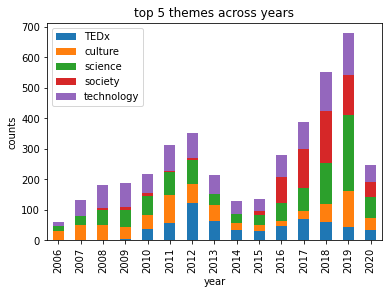

In [ ]:
# graph of 5 most popular theme across year
# popular_theme_df = theme_df.groupby(['published_year','theme'], as_index=False)['talk_name'].count()
# popular_theme_df = popular_theme_df.sort_values(['published_year', 'talk_name'], ascending=[True, False]).groupby(['published_year']).head(5)
top_5 = ['TEDx','culture','science','society','technology']
popular_theme_df = theme_df[theme_df['theme'].isin(top_5)].groupby(['published_year','theme'], as_index=False)['talk_name'].count()
popular_theme_df = popular_theme_df.rename(columns={'talk_name': 'count'})
index = ['2006','2007','2008','2009','2010','2011','2012','2013','2014',
         '2015','2016','2017','2018','2019','2020']
headers = top_5
data = [[0,32,14,0,16],[0,51,29,0,54],[0,49,52,6,76],[5,40,54,11,79],
        [36,47,62,9,64],[58,90,76,5,85],[123,62,78,6,84],[64,53,34,1,63],
        [34,23,29,2,42],[32,17,34,15,39],[48,17,59,83,73],[70,26,75,130,88],
        [61,60,133,170,129],[45,118,249,130,137],[33,41,67,51,56]]
popular_theme_plot = pd.DataFrame(data, columns = headers,index=index) 
popular_theme_plot.plot(kind='bar', stacked=True)
plt.title("top 5 themes across years")
plt.xlabel("year")
plt.ylabel("counts")

We can see from the graph above that the theme of technology and science (label in purple and green) are always the hot ones and the society themes(label in red) are not very much used until the last five years.

### Month, year, weekday, hour

TED Talks tend to occur all throughout the year. Is there a hot month as far as TED is concerned? 

In other words, how are the talks distributed throughout the months and years since its inception? Let us find out!

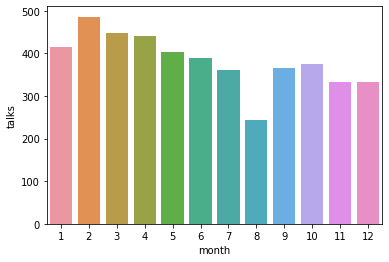

In [ ]:
# best month to publish
month_df = pd.DataFrame(df['published_month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']
sns.barplot(x='month', y='talks', data=month_df)

From the plot, the best month to publish is February.And August seems the unlucky month to publish.

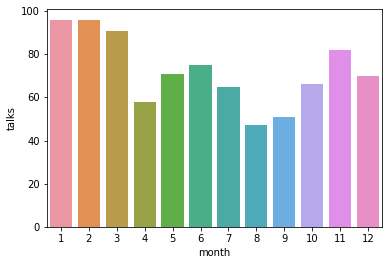

In [ ]:
# best month to publish (contains TEDX)
df_x = df[df['event'].str.contains('TEDx')]
x_month_df = pd.DataFrame(df_x['published_month'].value_counts().reset_index())
x_month_df.columns = ['month', 'talks']
sns.barplot(x='month', y='talks', data=x_month_df)

When we take TEDx into account, both January and February are the best  months to publish.

So we can get the conlusion, both January and February are the most popular months


Now, Let us explore the distribution of ted talks through the years.

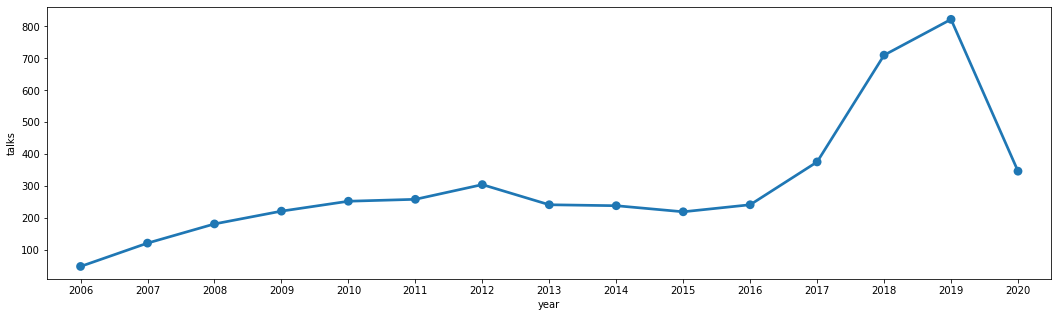

In [ ]:
# visualize the number of TED talks through the years
year_df = pd.DataFrame(df['published_year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_df)

So in the weekday, which day is the most popular day?

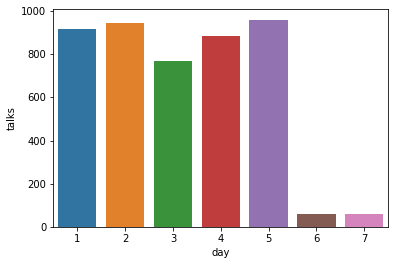

In [ ]:
#the most popular days for conducting TED 
day_df = pd.DataFrame(df['published_weekday'].value_counts()).reset_index()
day_df.columns = ['day', 'talks']
sns.barplot(x='day', y='talks', data=day_df)

Friday is the most popular day and weekend is much less than any other day of the week. This is a really intuitive result.  

Then, Let us construct a heat map that shows the number of talks by month and year. February 2019 has the most talks.

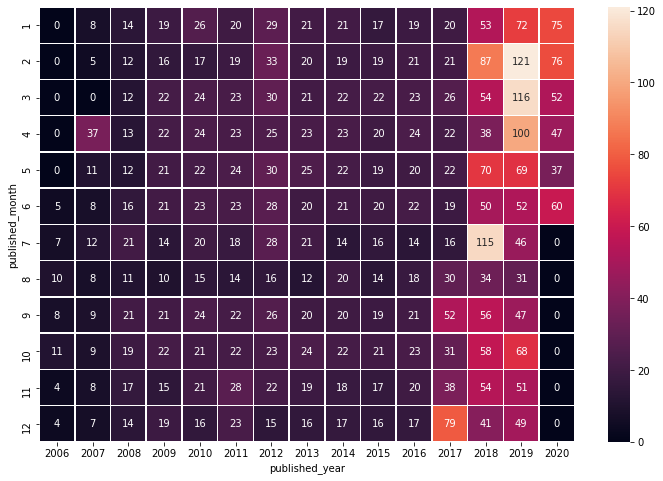

In [ ]:
#construct a heat map that shows the number of talks by month and year
hmap_df = df.copy()
hmap_df = hmap_df.sort_values(['published_year', 'published_month'])
hmap_df = pd.pivot_table(hmap_df[['published_year', 'published_month', 'talk_name']], index=['published_year', 'published_month'], aggfunc='count').reset_index()
hmap_df = hmap_df[['published_month', 'published_year', 'talk_name']]
hmap_df.drop_duplicates(subset=['published_month', 'published_year'],inplace=True)
hmap_df = hmap_df.pivot('published_month', 'published_year', 'talk_name')
hmap_df = hmap_df.fillna(0)
hmap_df
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(hmap_df, annot=True, linewidths=.5, ax=ax, fmt='n')

### Speaker and occupation

In this part, we will gain a insight learn about all the speakers who have managed to inspire millions of people through their talks on the TED Platform. The first question we would ask  is who are the most popular TED Speakers. 

That is, which speakers have given the most number of TED Talks

In [ ]:
#which speakers have given the most number of TED Talks.
speaker_df = df.groupby('speaker_name').count().reset_index()[['speaker_name', 'comment_count_log']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

,main_speaker,appearances
1901,Juan Enriquez,9
1423,Hans Rosling,9
1381,Greg Gage,9
2335,Marco Tempest,7
785,Dan Ariely,6
467,Bill Gates,6
3057,Rives,6
2798,Paola Antonelli,5
2510,Michael Green,5
733,Clay Shirky,5


1.Juan Enriquezis,Hans Rosling,Greg Gage clearly are the most popular TED Speakers, with more than 9 appearances on the TED Forum. 

2.Marco Tempest comes a close second with 7 appearances.

3.Dan Ariely ,Bill Gates and Rives have graced the TED platform 6 times.

Which occupation should you choose if you want to become a TED Speaker? Let us have a look what kind of people TED is most interested in inviting to its events.

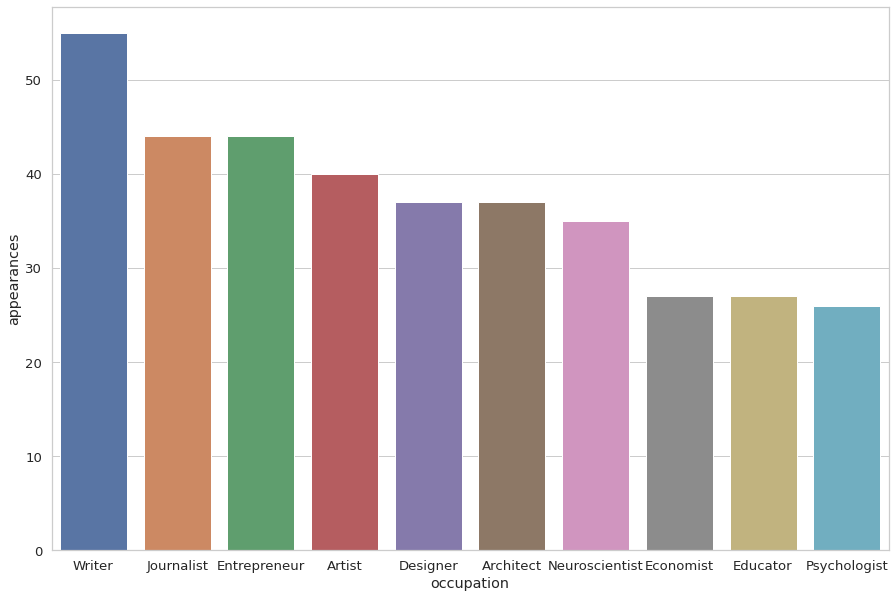

In [ ]:
#Which occupation should you choose if you want to become a TED Speaker? 
occupation_df = df.groupby('speaker_description').count().reset_index()[['speaker_description', 'comment_count_log']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)
plt.figure(figsize=(15,10))
sns.set(style = "whitegrid", font_scale=1.2)
sns.barplot(x='occupation', y='appearances', data=occupation_df.head(10))
plt.show()



1.Writers are the most popular with more than 50 speakers identifying themselves as the aforementioned.

2.Journalist and Entrepreneur come a distant second with around 43 speakers in each category.




This result must be taken with a pinch of salt as a considerable number of speakers identify themselves with multiple professions (for example, writer/entrepreneur). Then, we would perform an wordcloud for occupations to show a more clear for readers.

We also create the wordcloud for the occupations below to show more comprehensively (include not only the top 10 common occupations) and directly what the most common jobs are for the speakers.

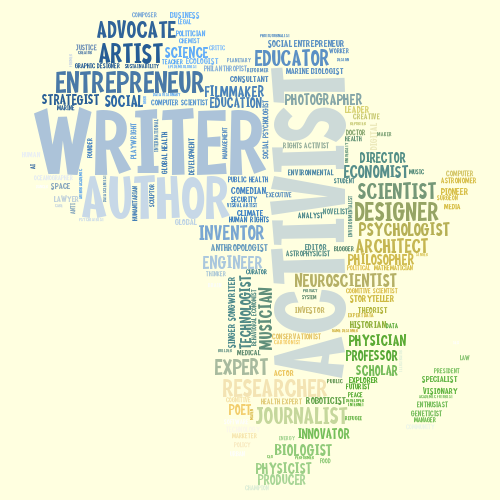

In [ ]:
#wordcloud for occupations
mask3  = np.array(Image.open('/content/mask3.png'))
mask_colors = ImageColorGenerator(mask3)
wc4 = WordCloud( font_path = '/content/font.ttf',\
                max_words=500,\
                background_color ='lightyellow',\
                mask = mask3,color_func = mask_colors)
wc4.generate(', '.join(df['speaker_description'].dropna()))
wc4.to_image()


Also we are curious about what occupation tend to attract a larger number of viewers?

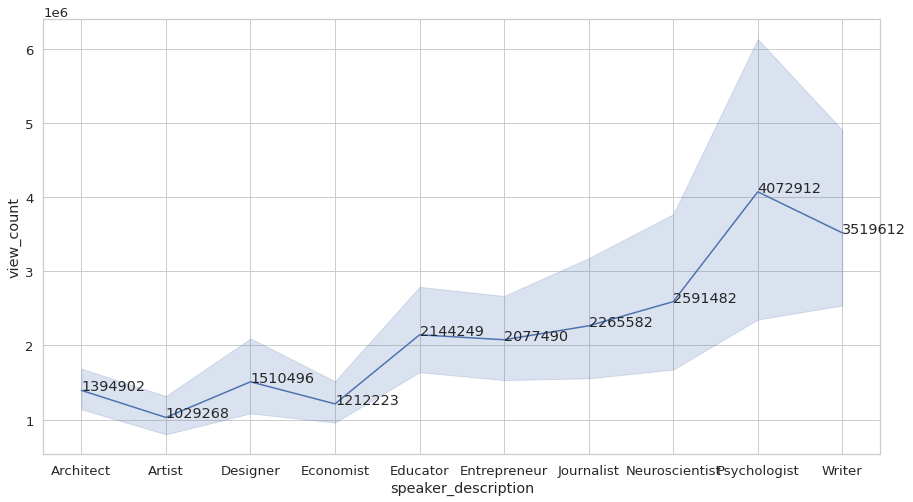

In [ ]:
#what occupation tend to attract a larger number of viewers?

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
a = df[df['speaker_description'].isin(occupation_df.head(10)['occupation'])].sort_values("speaker_description")
sns.lineplot(x='speaker_description', y='view_count', data= a , palette="muted", ax =ax)
#annotate
mean = a.groupby("speaker_description")["view_count"].mean().astype('int')
for i in range(10):
  ax.annotate(mean[i], (list(mean.index)[i], mean[i]))
plt.show()

The result is amazing. 


1.We found Psychologist is the occupation that attracts the most views.

2.Writer comes a distant second with 3519612 views.

3.And Educator,Entrepreneur,Journalist and Neuroscientist are very close to each other with around 2000000 views.








---



### Views

For deep analysis, we want to know more about the most viewed TED talks of all time are. Who is the professor with the most views?

 This is a good question to explore.

In [ ]:
#Sort the talk by number of views and then find its speaker.
view_df = df.sort_values(by=['view_count'],ascending=False)
view_df['first_name'] = [i.split(" ")[0] for i in view_df["speaker_name"]]

In [ ]:
view_df[["talk_name", 'speaker_name', "view_count"]].head(1)


,talk_name,speaker_name,view_count
talk_id,,,
66,Do schools kill creativity?,Ken Robinson,65678748



"Do schools kill creativity" by Ken Robinson is the most viewed talk of all time.

Then we would like to find the 10 most viewed talks of all time and visiualize them with their view counts and show their speakers.


In [ ]:
# 10 most viewd talks
view_df[["talk_name", 'speaker_name', "view_count"]].head(10)


,talk_name,speaker_name,view_count
talk_id,,,
66,Do schools kill creativity?,Ken Robinson,65678748
2405,This is what happens when you reply to spam email,James Veitch,59725446
1569,Your body language may shape who you are,Amy Cuddy,57734063
848,How great leaders inspire action,Simon Sinek,50494918
1042,The power of vulnerability,Brené Brown,48503432
2034,How to speak so that people want to listen,Julian Treasure,42330489
2458,Inside the mind of a master procrastinator,Tim Urban,39714672
2225,The next outbreak? We're not ready,Bill Gates,35814459
13587,My philosophy for a happy life,Sam Berns,34858496


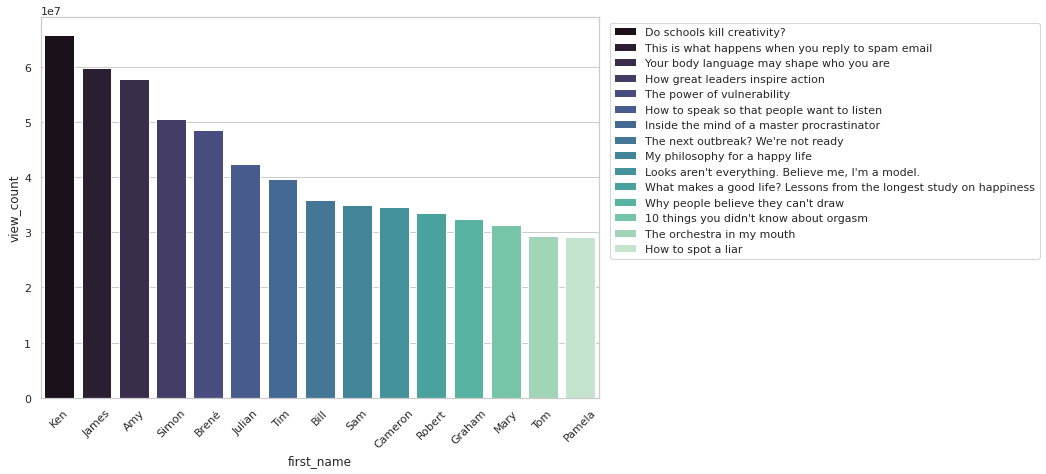

In [ ]:
sns.set(style = 'whitegrid', font_scale=1)
plt.figure(figsize=(10,7))
sns.barplot(x='first_name', y='view_count',hue ='talk_name', data=view_df[:15],dodge = False, palette="mako")
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 1))
plt.show()



1.The talk with most views is 'Do school kill creativity' which is conducted by Ken.

2.James' talk, this is what happens when you reply to spam email ,is  the second most polupar viewd.

3.And 'Your body language may shape who you are' is the very close third popular.  



Next, we would like to find the most popular viewed talks for each year.

In [ ]:
# most viewed talks in each year
most_viewed = view_df.groupby("published_year", as_index=False).apply(lambda x: x.sort_values(by = "view_count",ascending=False).head(1))

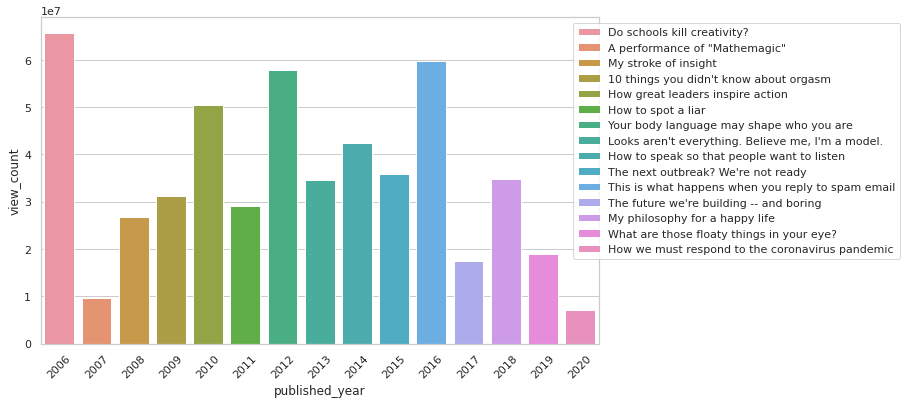

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='published_year', y='view_count',hue ='talk_name',  data = most_viewed, dodge = False)
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.55, 1))
plt.show()

From the plot, we learn that the top picks of the year vary a lot. 

1.In 2006 and 2007, the two most popular viewd talks in this two year have imcoparable numbers of views than other years.

2.On the contrary, in 2007 and 2020, even the most populr two talks have little views , about just one-sixth of 2006.

Another question that we are interested in is if the number of views is correlated with the number of comments. We should think that this is the case as more popular videos tend to have more comments. Let us find out.

<Figure size 1080x1080 with 0 Axes>

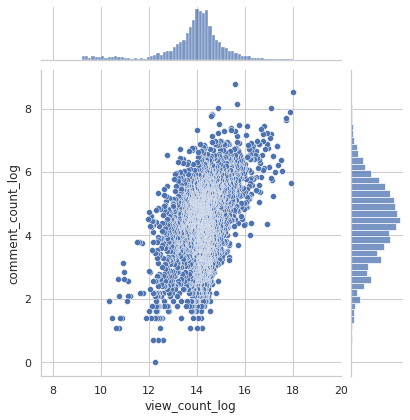

In [ ]:
# view vs. comment
plt.figure(figsize=(15,15))
sns.jointplot(x='view_count_log', y='comment_count_log', data=df,  xlim = (7.5,20))


As the scatterplot shown, the number of views has a strong correlation to the number of comments. This is in the way that was expected. 

### Languages




One remarkable aspect of TED Talks is the  number of languages in which it is accessible. Let us perform some very basic data visualisation and descriptive statistics about languages at TED.

In [ ]:
df.groupby("language").count()["talk_name"]

language
en    4572
es      17
fr       1
Name: talk_name, dtype: int64

In [ ]:
# most viewed talk in each langauge
language_df= df.groupby("language", as_index=False).apply(lambda x: x.sort_values(by = "view_count",ascending=False).head(1))
language_df

,,talk_name,talk_description,view_count,comment_count,duration,transcript,video_type_name,event,number_of_speakers,speaker_id,speaker_name,speaker_description,speaker_who_he_is,speaker_why_listen,speaker_what_others_say,speaker_is_published,is_talk_featured,has_talk_citation,talks_tags,number_of_tags,language,native_language,is_subtitle_required,number_of_subtitled_videos,talk_download_languages,number_of_talk_download_languages,related_talks,number_of_related_talks,intro_duration,ad_duration,post_ad_duration,talks_player_talks_resources_h264_00_bitrate,view_count_log,comment_count_log,duration_log,desc_len,title_len,transcript_len,speak_speed,published_month,published_year,published_hour,published_weekday,gap_months
,talk_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,66,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,65678748,4952.0,1164,Good morning. How are you?(Audience) Good.It's...,TED Stage Talk,TED2006,1,69.0,Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,True,True,0.0,"['children', 'creativity', 'culture', 'dance',...",7,en,en,False,61,"[{'languageName': 'Portuguese, Brazilian', 'en...",62,"[{'id': '865', 'hero': 'https://pe.tedcdn.com/...",6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,6,2006,0,2,4.066667
1,16778,Fracaso tras fracaso,La forma en que manejamos la adversidad en nue...,4604610,NaN,1114,NaN,TEDx Talk,TEDxCalzadaDeLosHéroes,1,4111.0,Karla Souza,Actriz,Una de las mexicanas más creativas del mundo s...,NaN,NaN,False,False,NaN,"['TED en Español', 'family', 'storytelling', '...",4,es,es,False,0,[],0,"[{'id': '2830', 'hero': 'https://s3.amazonaws....",6,0.00,0.00,0.00,NaN,15.342569,NaN,7.016610,43,3,NaN,NaN,7,2018,20,3,40.500000
2,61551,Et si la bière était féminine ? | Elisabeth Pi...,Cette présentation a été faite lors d'un événe...,0,NaN,1135,C'est la première sortie de mes années collège...,TEDx Talk,TEDxToulouse,1,5929.0,Elisabeth Pierre,Zythologist,Elisabeth is a Zythologist,NaN,NaN,False,False,NaN,"['history', 'women', 'innovation', 'food', 'so...",5,fr,fr,False,0,"[{'languageName': 'French', 'endonym': 'França...",1,"[{'id': '204', 'hero': 'https://s3.amazonaws.c...",6,0.00,0.00,0.00,NaN,0.000000,NaN,7.035269,105,12,2280.0,2.01,3,2020,0,6,71.166667


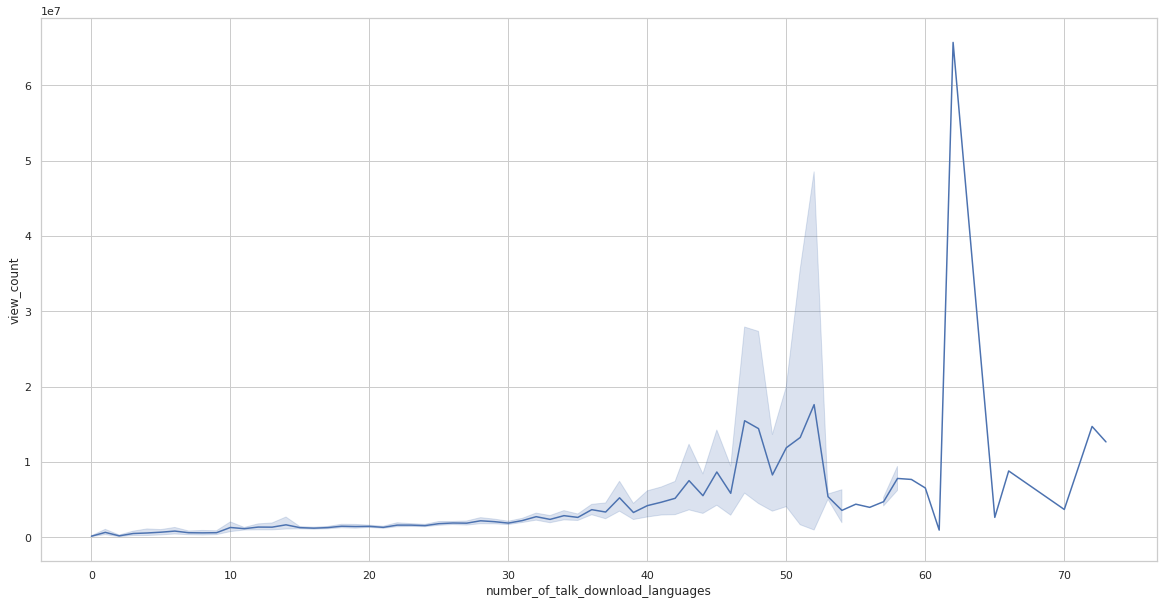

In [ ]:
# views vs number of download language
plt.figure(figsize=(20,10))
sns.lineplot(x='number_of_talk_download_languages', y='view_count',data=df)
plt.show()

From this plot, we clearly know that views have a strong relation with the number of talk download languages.

The talk with more downloaded languages are usually associated with more views. And the peak of the view count is with the talk that has 60+ download languages.

### Ted events

In [ ]:
#Which TED Events tend to hold the most number of TED.com upload worthy events? 
events_df = df[['talk_name', 'event']].groupby('event').count().reset_index()
events_df.columns = ['event', 'talks']
events_df = events_df.sort_values('talks', ascending=False)
events_df.head(10)

,event,talks
67,TED-Ed,588
90,TED2018,104
91,TED2019,101
89,TED2017,97
86,TED2014,84
81,TED2009,84
88,TED2016,77
87,TED2015,75
85,TED2013,75
133,TEDGlobal 2012,70


TED-Ed had the especially most number of talks followed by TED2018. 

There isn't too much insight to be gained from this we can only know that the TED-Ed event or initiative, which in full us called TED's youth and education initiative that aims to spark and celebrate the ideas and knowledge-sharing of teachers and students around the world has the most number of talks.

### Transcript


What is the most important thing that a speaker should prepare with before the talk? We think it is the transcript. So in this section, we will analyze the transcript to explore how the words used in talks are related to the popularity of the talks. We use the natural language toolkit to tokenize each targeted transcript and try to find the words that are most common in talks with a lot of views and only a few views.


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from collections import Counter


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#set the stopwords in both english spanish and french since the ted talk is not only in english
stopword = set(stopwords.words('english')).union(set(stopwords.words("spanish"))).union(set(stopwords.words("french")))


In [ ]:
def tokenize_content(content):
  """returns tokenized string

  :param content: text string
  :return: tokenized text/list of words
  """
  
  words = nltk.word_tokenize(content)
  
  words = [word.lower()for word in words if word.isalpha() if word.lower() not in stopword]

  return words

We need to clean and separate the transcripts before tokenize them. We will first drop the null values. And then create a list of transcripts that's in top 10 percentile of views and another list of transcripts that's in the lowest 10 percentile of views

Also, we can notice that there are many irrelevant thing in the '()' so we need to remove any contents between '()' in every transcript. We are going to clean out all of these patterns using **regex**. 

In [ ]:
transcript_df = df.dropna(subset= ["transcript"])
top_10_view = transcript_df[transcript_df['view_count'] > transcript_df['view_count'].quantile(0.9)]
lowest_10_view = transcript_df[df['view_count'] < transcript_df['view_count'].quantile(0.1)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
top_10_view["transcript"][66]

'Good morning. How are you?(Audience) Good.It\'s been great, hasn\'t it? I\'ve been blown away by the whole thing. In fact, I\'m leaving.(Laughter)There have been three themes running through the conference, which are relevant to what I want to talk about. One is the extraordinary evidence of human creativity in all of the presentations that we\'ve had and in all of the people here; just the variety of it and the range of it. The second is that it\'s put us in a place where we have no idea what\'s going to happen in terms of the future. No idea how this may play out.I have an interest in education. Actually, what I find is, everybody has an interest in education. Don\'t you? I find this very interesting. If you\'re at a dinner party, and you say you work in education — actually, you\'re not often at dinner parties, frankly.(Laughter)If you work in education, you\'re not asked.(Laughter)And you\'re never asked back, curiously. That\'s strange to me. But if you are, and you say to somebo

In [ ]:
import re
def remove_bad_patterns(text):
    
    return re.sub('\([^)]*\)','',text) 

In [ ]:
top_10_view["transcript"] = [remove_bad_patterns(x) for x in top_10_view["transcript"]]
lowest_10_view["transcript"] =  [remove_bad_patterns(x) for x in lowest_10_view["transcript"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We can see from the following example that we successfully cleaned the transcripts.

In [ ]:
top_10_view["transcript"][66]

'Good morning. How are you? Good.It\'s been great, hasn\'t it? I\'ve been blown away by the whole thing. In fact, I\'m leaving.There have been three themes running through the conference, which are relevant to what I want to talk about. One is the extraordinary evidence of human creativity in all of the presentations that we\'ve had and in all of the people here; just the variety of it and the range of it. The second is that it\'s put us in a place where we have no idea what\'s going to happen in terms of the future. No idea how this may play out.I have an interest in education. Actually, what I find is, everybody has an interest in education. Don\'t you? I find this very interesting. If you\'re at a dinner party, and you say you work in education — actually, you\'re not often at dinner parties, frankly.If you work in education, you\'re not asked.And you\'re never asked back, curiously. That\'s strange to me. But if you are, and you say to somebody, you know, they say, "What do you do?

In [ ]:
list1 = [tokenize_content(content) for content in top_10_view["transcript"]]
list2 = [tokenize_content(content) for content in lowest_10_view["transcript"]]

highest_tokens = [y for x in list1 for y in x]
highest_counter = Counter(highest_tokens)
lowest_tokens = [y for x in list2 for y in x]
lowest_counter = Counter(lowest_tokens)


The following are the 20 words that are most commonly being said by speaker of the top 10 and lowest 10  percentile viewed talk 

In [ ]:
highest_diffs= highest_counter-lowest_counter
distinct_highest_common= highest_diffs.most_common(20)
distinct_highest_common

[('people', 1371),
 ('one', 1117),
 ('like', 1094),
 ('said', 955),
 ('would', 753),
 ('get', 686),
 ('think', 644),
 ('say', 641),
 ('want', 601),
 ('brain', 570),
 ('know', 554),
 ('two', 552),
 ('going', 526),
 ('right', 519),
 ('life', 508),
 ('good', 495),
 ('really', 454),
 ('things', 452),
 ('time', 439),
 ('got', 408)]

In [ ]:
lowest_diffs = lowest_counter - highest_counter
distinct_lowest_common= lowest_diffs.most_common(20)
distinct_lowest_common

[('fish', 194),
 ('health', 183),
 ('ocean', 177),
 ('public', 105),
 ('new', 103),
 ('community', 102),
 ('water', 102),
 ('air', 92),
 ('hedge', 88),
 ('war', 85),
 ('local', 82),
 ('design', 81),
 ('species', 80),
 ('sharks', 80),
 ('africa', 78),
 ('city', 76),
 ('architecture', 74),
 ('penguins', 74),
 ('data', 72),
 ('project', 72)]

Next, we visualize these words by creating two word clouds. These word clouds will show more directly what are those are common in popular and unpopular talks. 

Looking at these two graph, people can easily distinguish the common words used in popular and unpopular talk transcripts. For example, we can see that in talks with few views, words that related to ocean are commonly used (eg. "fish", "ocean", "shark"). In this way, we can make a rough guess saying that people may not interested in this kind of topic.

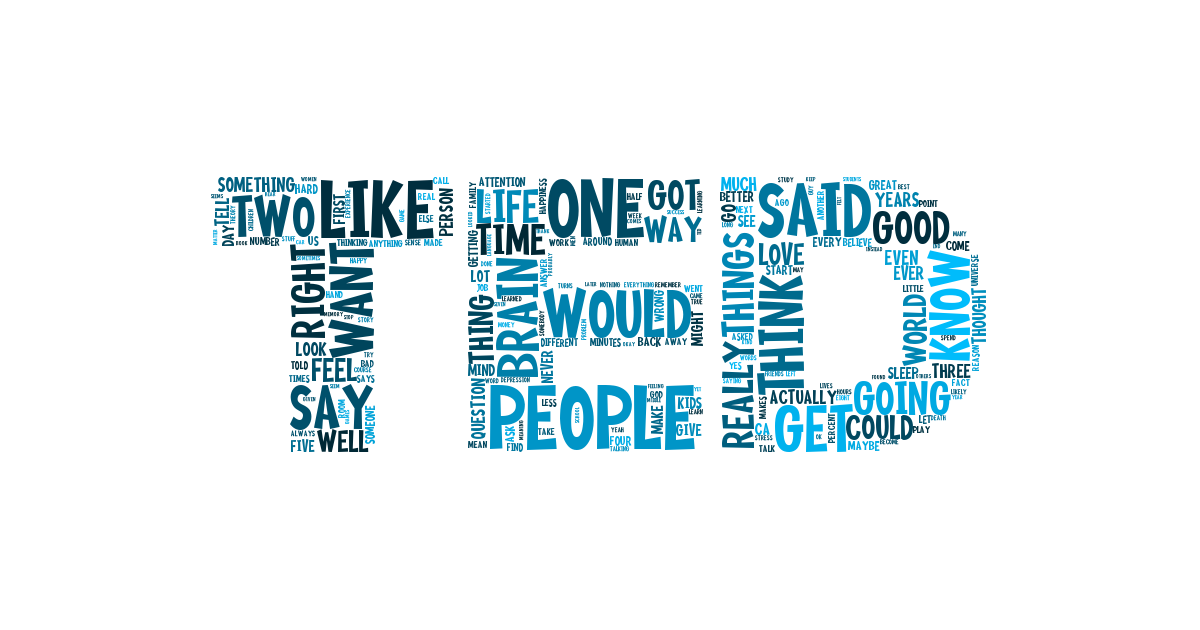

In [ ]:
mask = np.array(Image.open('/content/mask.png'))

wc1 = WordCloud(color_func=get_single_color_func('deepskyblue'),font_path = '/content/font.ttf', \
                background_color ='white',mask = mask, stopwords =STOPWORDS)

highest_wc = wc1.generate_from_frequencies(highest_diffs)
highest_wc.to_image()

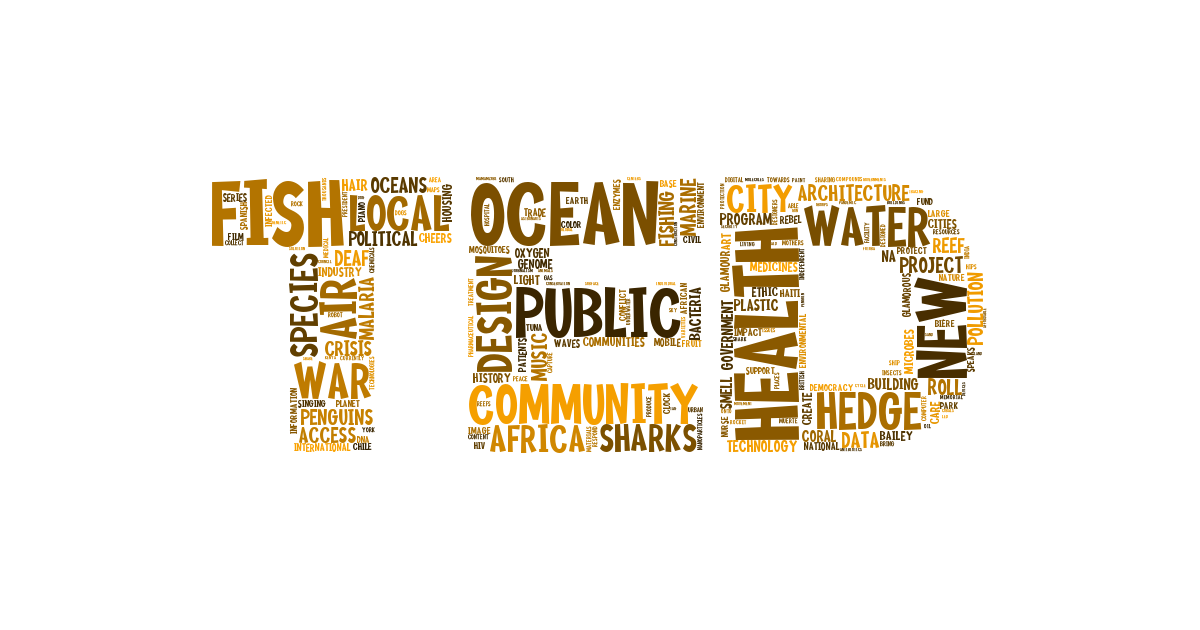

In [ ]:
wc2 = WordCloud(font_path = '/content/font.ttf',mask = mask,\
                background_color = 'white', color_func=get_single_color_func('orange'))
lowest_wc = wc2.generate_from_frequencies(lowest_diffs)
lowest_wc.to_image()

### Description 

Besides, we think the talk description shown on the ted official website will affect people's decision of viewing the talk or not. 

So other than the transcript for each talk, we would like to discover the most common words in the discription of the top 10 percentile viewed talks. 

In [ ]:
# by description 
description_df = df.copy()
description_df = description_df[description_df['view_count'] > description_df['view_count'].quantile(0.9)]


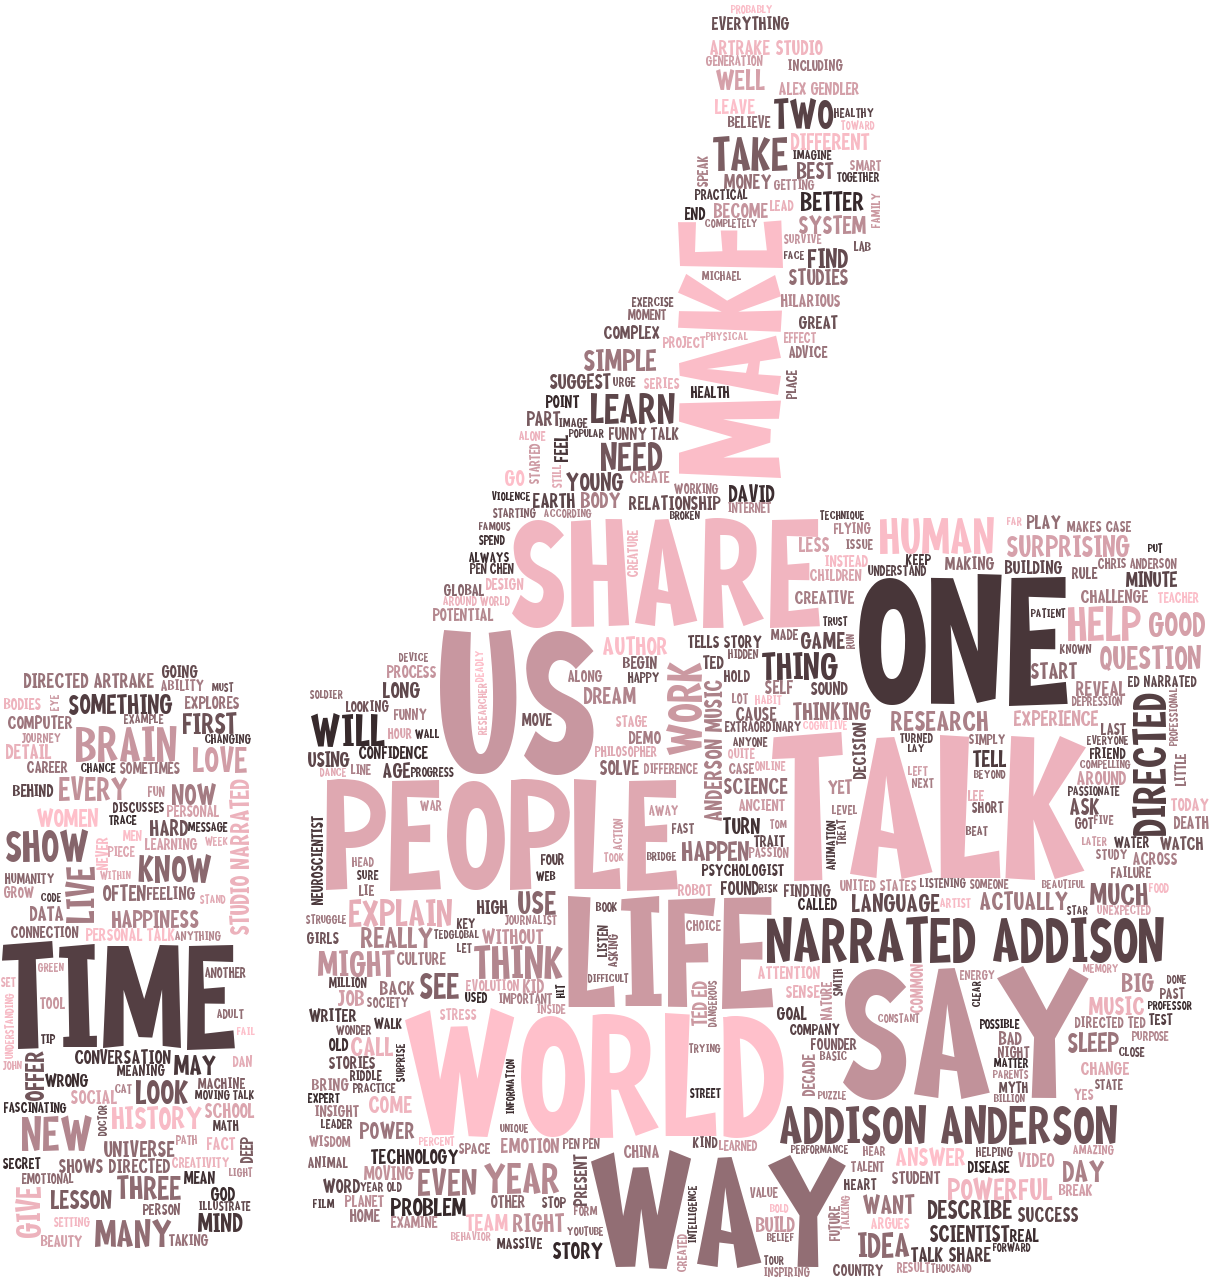

In [ ]:
mask2 = np.array(Image.open('/content/mask2.png'))
wc5 = WordCloud( font_path = '/content/font.ttf',mask = mask2, \
                stopwords =STOPWORDS, max_words=500,\
                background_color = 'white',color_func=get_single_color_func('pink'))
description_wc = wc5.generate_from_text(','.join(description_df["talk_description"]))
description_wc.to_image()

We still use the number of views as a measuring standard for popularity. The above is a word cloud for those talks with top 10% number of views. From this plot, we can make several guesses like people may be interested the topics of time and poeple may like narration from Addison Anderson, who is the narrator for the TED-Ed Youtube channel. 

### Duration and speed

Do durations and speed of ted talks matters? This is a good question to explore.

First, we start with how the duration is distribution when considering the numbers of view.. It should be noted that time is first converts to minutes for convinient!

In [ ]:
# second converts to minutes
df['duration'] = df['duration']/60
df['duration'].describe()

count    4590.000000
mean       12.118540
std         6.567267
min         0.000000
25%         6.854167
50%        12.041667
75%        15.966667
max        87.616667
Name: duration, dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


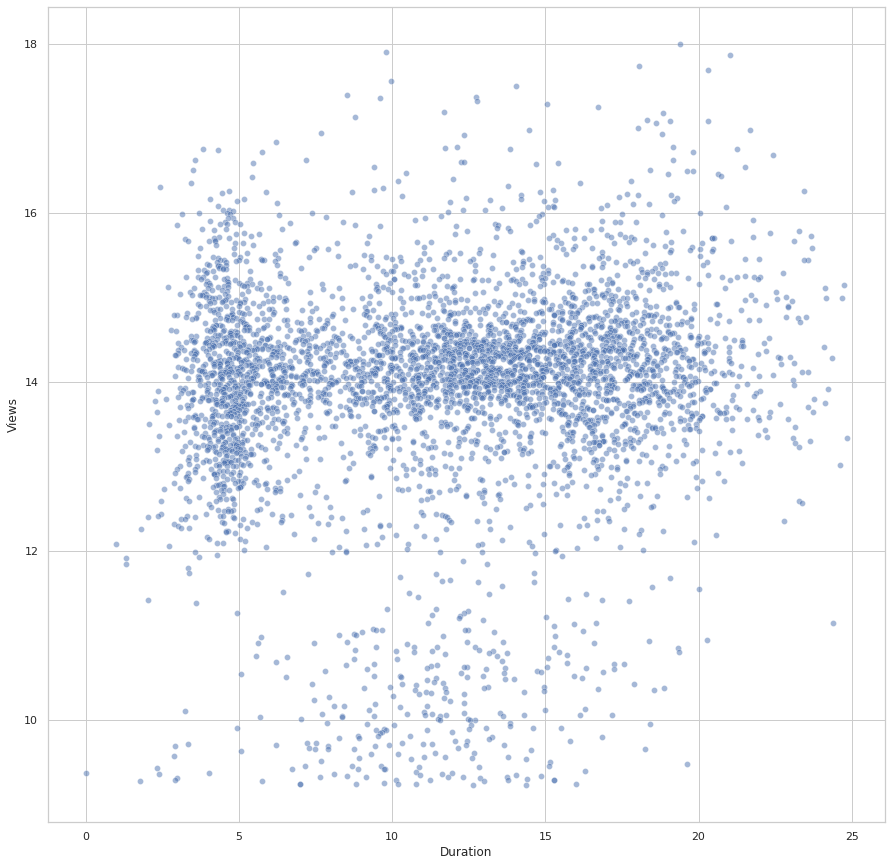

In [ ]:
plt.figure(figsize = (15,15))

sns.scatterplot(x='duration', y='view_count_log', alpha=.5,palette="muted",\
                data=df[ df['duration'] < 25][df['view_count_log']>0])
plt.xlabel('Duration')
plt.ylabel('Views')
plt.show()

It seems interesting. Longer the time is , less attractive the talk is .So duration is an important factor that the speakers should think about.

So, what is the realtionship between speak apeed and numbers of view?

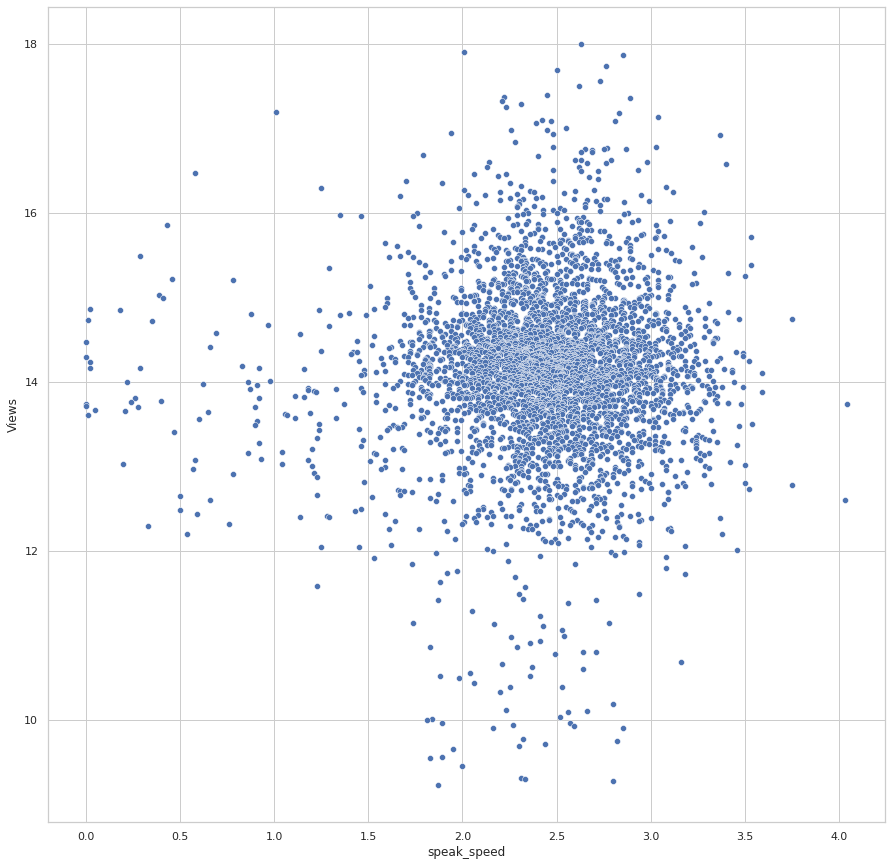

In [ ]:
plt.figure(figsize = (15,15))

sns.scatterplot(x='speak_speed', y='view_count_log',palette="muted",\
                data=df[ df['view_count_log']>0])
plt.ylabel('Views')
plt.show()

From the plot, we know that the speak speed around 2.5 seems better and common. 

# Section 4 - Final Data Processing

### Wikipedia Page

> We are also interested in how the speaker's Wikipedia page affect the views (i.e. page length). The first step we did was scaping a Wikipedia page https://en.wikipedia.org/wiki/List_of_TED_speakers which has a list of speakers in recent years with one column being the speaker's name and the other being the event the speaker attended. The speaker's name is hyperlinked with his/her Wikipedia page.

> We also deleted the speakers who doesn't have a hyperlink. So the dataframe created is a three column dataframe with the speaker's vali page link attached.

In [ ]:
from bs4 import BeautifulSoup
import requests

website_url = requests.get('https://en.wikipedia.org/wiki/List_of_TED_speakers').text
soup = BeautifulSoup(website_url,'lxml')

wiki_list = []
name_none = ['Becky Blanton','Woody Norris','Diane Wolk-Rogers']

for i in range(25):
  My_table = soup.find_all('table',{'class':'wikitable sortable'})[i]
  links = My_table.findAll('a')
  hyperlinks = []
  for link in links:
    hyperlinks.append(link.get('href'))
  hyperlinks = [m for m in hyperlinks if m[:3]=='/w/' or m[:6]=='/wiki/' and 
     m!='/wiki/TED_(conference)#TED_Prize' and m!='/wiki/Wikipedia:Citation_needed']

  wiki_df = pd.read_html(website_url)[i+3]
  wiki_df = wiki_df[~wiki_df.Speaker.isin(name_none)]
  wiki_df['url']=hyperlinks
  wiki_list.append(wiki_df.values.tolist())


In [ ]:
wikipedia_df = pd.DataFrame(wiki_list[0]) 

for i in range(25):
  df_temp = pd.DataFrame(wiki_list[i]) 
  wikipedia_df = pd.concat([wikipedia_df,df_temp], ignore_index=True)

columns_name = ['name','event','url']
wikipedia_df.columns=columns_name
wikipedia_df['url'] = 'https://en.wikipedia.org/' + wikipedia_df['url'].astype(str)
wikipedia_df

,name,event,url
0,Trevor Aaronson,How this FBI strategy is actually creating US-...,https://en.wikipedia.org//wiki/Trevor_Aaronson
1,Chris Abani,Telling stories from Africa (TEDGlobal 2007) O...,https://en.wikipedia.org//wiki/Chris_Abani
2,Hawa Abdi,Mother and daughter doctor-heroes (TEDWomen 2010),https://en.wikipedia.org//wiki/Hawa_Abdi
3,Marc Abrahams,"A science award that makes you laugh, then thi...",https://en.wikipedia.org//wiki/Marc_Abrahams
4,J.J. Abrams,The mystery box (TED2007),https://en.wikipedia.org//wiki/J.J._Abrams
...,...,...,...
997,Eva Zeisel,The playful search for beauty (TED2001),https://en.wikipedia.org//wiki/Eva_Zeisel
998,Philip Zimbardo,The psychology of evil (TED2008) The psycholog...,https://en.wikipedia.org//wiki/Philip_Zimbardo
999,Jonathan Zittrain,The Web as random acts of kindness (TEDGlobal ...,https://en.wikipedia.org//wiki/Jonathan_Zittrain
1000,Ethan Zuckerman,Listening to global voices (TEDGlobal 2010),https://en.wikipedia.org//wiki/Ethan_Zuckerman


Next, we scraped the corresponding url page and get the page length by counting how many words are there. The dataframe now has four columns

In [ ]:
wikipedia_df['length'] = 0

for index, row in wikipedia_df.iterrows():
  response = requests.get(row['url'])
  length = 0
  wiki = BeautifulSoup(response.text,"html.parser")
  for i in wiki.select('p'):
      length += len(i.getText())
  wikipedia_df['length'].iloc[index] = length

wikipedia_df


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,name,event,url,length
0,Trevor Aaronson,How this FBI strategy is actually creating US-...,https://en.wikipedia.org//wiki/Trevor_Aaronson,420
1,Chris Abani,Telling stories from Africa (TEDGlobal 2007) O...,https://en.wikipedia.org//wiki/Chris_Abani,3028
2,Hawa Abdi,Mother and daughter doctor-heroes (TEDWomen 2010),https://en.wikipedia.org//wiki/Hawa_Abdi,5558
3,Marc Abrahams,"A science award that makes you laugh, then thi...",https://en.wikipedia.org//wiki/Marc_Abrahams,422
4,J.J. Abrams,The mystery box (TED2007),https://en.wikipedia.org//wiki/J.J._Abrams,13737
...,...,...,...,...
997,Eva Zeisel,The playful search for beauty (TED2001),https://en.wikipedia.org//wiki/Eva_Zeisel,11238
998,Philip Zimbardo,The psychology of evil (TED2008) The psycholog...,https://en.wikipedia.org//wiki/Philip_Zimbardo,15383
999,Jonathan Zittrain,The Web as random acts of kindness (TEDGlobal ...,https://en.wikipedia.org//wiki/Jonathan_Zittrain,11842
1000,Ethan Zuckerman,Listening to global voices (TEDGlobal 2010),https://en.wikipedia.org//wiki/Ethan_Zuckerman,3745


In [ ]:
 wikipedia_df.to_csv('/content/ted-dataset/wikipedia_df.csv',index=False)

In [ ]:
 wikipedia_df = pd.read_csv('/content/ted-dataset/wikipedia_df.csv')
 wikipedia_df

,name,event,url,length
0,Trevor Aaronson,How this FBI strategy is actually creating US-...,https://en.wikipedia.org//wiki/Trevor_Aaronson,420
1,Chris Abani,Telling stories from Africa (TEDGlobal 2007) O...,https://en.wikipedia.org//wiki/Chris_Abani,3028
2,Hawa Abdi,Mother and daughter doctor-heroes (TEDWomen 2010),https://en.wikipedia.org//wiki/Hawa_Abdi,5558
3,Marc Abrahams,"A science award that makes you laugh, then thi...",https://en.wikipedia.org//wiki/Marc_Abrahams,422
4,J.J. Abrams,The mystery box (TED2007),https://en.wikipedia.org//wiki/J.J._Abrams,13737
...,...,...,...,...
997,Eva Zeisel,The playful search for beauty (TED2001),https://en.wikipedia.org//wiki/Eva_Zeisel,11238
998,Philip Zimbardo,The psychology of evil (TED2008) The psycholog...,https://en.wikipedia.org//wiki/Philip_Zimbardo,15383
999,Jonathan Zittrain,The Web as random acts of kindness (TEDGlobal ...,https://en.wikipedia.org//wiki/Jonathan_Zittrain,11842
1000,Ethan Zuckerman,Listening to global voices (TEDGlobal 2010),https://en.wikipedia.org//wiki/Ethan_Zuckerman,3745


## One-hot encoding and final cleaning

> To finalize the dataframe for modelling, we need to do some one-hot encoding and final cleaning work. We prepared two dataframes for modelling: the original dataframe, and the original one with the Wikipedia features included. 

### Original dataframe

The following categorical features for one-hot encoding were selected: `published_weekday`, `published_year`, `published_month`, `published_hour`, `language`, `native_language`.

In [ ]:
orig_df = df.copy()
orig_df.published_weekday = orig_df.published_weekday.astype('category')
orig_df.published_year = orig_df.published_year.astype('category')
orig_df.published_month = orig_df.published_month.astype('category')
orig_df.published_hour = orig_df.published_hour.astype('category')
orig_df.language = orig_df.language.astype('category')
orig_df.native_language = orig_df.native_language.astype('category')

orig_df = pd.get_dummies(orig_df, columns=['published_weekday', 'language','native_language',
                                 'published_year','published_month','published_hour'])
orig_df.head()

,talk_name,talk_description,view_count,comment_count,duration,transcript,video_type_name,event,number_of_speakers,speaker_id,speaker_name,speaker_description,speaker_who_he_is,speaker_why_listen,speaker_what_others_say,speaker_is_published,is_talk_featured,has_talk_citation,talks_tags,number_of_tags,is_subtitle_required,number_of_subtitled_videos,talk_download_languages,number_of_talk_download_languages,related_talks,number_of_related_talks,intro_duration,ad_duration,post_ad_duration,talks_player_talks_resources_h264_00_bitrate,view_count_log,comment_count_log,duration_log,desc_len,title_len,transcript_len,speak_speed,gap_months,published_weekday_1,published_weekday_2,...,published_year_2017,published_year_2018,published_year_2019,published_year_2020,published_month_1,published_month_2,published_month_3,published_month_4,published_month_5,published_month_6,published_month_7,published_month_8,published_month_9,published_month_10,published_month_11,published_month_12,published_hour_0,published_hour_1,published_hour_2,published_hour_3,published_hour_4,published_hour_5,published_hour_6,published_hour_7,published_hour_8,published_hour_9,published_hour_10,published_hour_11,published_hour_12,published_hour_13,published_hour_14,published_hour_15,published_hour_16,published_hour_17,published_hour_18,published_hour_19,published_hour_20,published_hour_21,published_hour_22,published_hour_23
talk_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
66,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,65678748,4952.0,1164,Good morning. How are you?(Audience) Good.It's...,TED Stage Talk,TED2006,1,69.0,Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,True,True,0.0,"['children', 'creativity', 'culture', 'dance',...",7,False,61,"[{'languageName': 'Portuguese, Brazilian', 'en...",62,"[{'id': '865', 'hero': 'https://pe.tedcdn.com/...",6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,4.066667,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2405,This is what happens when you reply to spam email,"Suspicious emails: unclaimed insurance bonds, ...",59725446,288.0,588,"A few years ago, I got one of those spam email...",TED Stage Talk,TEDGlobal>Geneva,1,2664.0,James Veitch,Comedian and writer,"For James Veitch, a British writer and comedia...","Packed full of Nigerian princes, can't-miss in...","Sick of receiving so much spam, Veitch took ma...",True,True,0.0,"['comedy', 'curiosity', 'communication', 'humo...",5,False,47,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",47,"[{'id': '2236', 'hero': 'https://pe.tedcdn.com...",6,11.82,3.33,0.83,180.0,17.905269,5.666427,6.378426,62,10,1180.0,2.01,1.033333,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1569,Your body language may shape who you are,(NOTE: Some of the findings presented in this ...,57734063,2649.0,1262,So I want to start by offering you a free no-t...,TED Stage Talk,TEDGlobal 2012,1,1284.0,Amy Cuddy,Social psychologist,Amy Cuddy’s research on body language reveals ...,Amy Cuddy wasn’t supposed to become a successf...,"Using a few simple tweaks to body language, Ha...",True,True,0.0,"['body language', 'brain', 'business', 'psycho...",7,False,50,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",51,"[{'id': '1042', 'hero': 'https://pe.tedcdn.com...",6,11.82,3.33,0.83,180.0,17.871358,7.882315,7.141245,90,8,3602.0,2.85,3.233333,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
848,How great leaders inspire action,Simon Sinek has a simple but powerful model fo...,50494918,2093.0,1084,How do you explain when things don't go as we ...,TEDx Talk,TEDxPuget Sound,1,703.0,Simon Sinek,Leadership expert,Simon Sinek explores how leaders can inspire c...,Fascinated by the leaders who make impact in t...,NaN,True,True,0.0,"['T

Drop the unhelpful features and rows with null values.

In [ ]:
drop_cols = ['talk_name','talk_description','view_count','comment_count', 'duration',
             'transcript','video_type_name','speaker_id','speaker_name',
             'speaker_description','speaker_who_he_is','speaker_why_listen','speaker_what_others_say',
             'talks_tags','talk_download_languages','related_talks','event']
orig_df_cleaned = orig_df.drop(columns=drop_cols)
orig_df_cleaned = orig_df_cleaned.dropna(how='any')
orig_df_cleaned = orig_df_cleaned.rename(columns={'view_count_log': 'label'})
orig_df_cleaned

,number_of_speakers,speaker_is_published,is_talk_featured,has_talk_citation,number_of_tags,is_subtitle_required,number_of_subtitled_videos,number_of_talk_download_languages,number_of_related_talks,intro_duration,ad_duration,post_ad_duration,talks_player_talks_resources_h264_00_bitrate,label,comment_count_log,duration_log,desc_len,title_len,transcript_len,speak_speed,gap_months,published_weekday_1,published_weekday_2,published_weekday_3,published_weekday_4,published_weekday_5,published_weekday_6,published_weekday_7,language_en,language_es,language_fr,native_language_ar,native_language_de,native_language_en,native_language_es,native_language_fr,native_language_hi,native_language_it,native_language_ja,native_language_ko,...,published_year_2017,published_year_2018,published_year_2019,published_year_2020,published_month_1,published_month_2,published_month_3,published_month_4,published_month_5,published_month_6,published_month_7,published_month_8,published_month_9,published_month_10,published_month_11,published_month_12,published_hour_0,published_hour_1,published_hour_2,published_hour_3,published_hour_4,published_hour_5,published_hour_6,published_hour_7,published_hour_8,published_hour_9,published_hour_10,published_hour_11,published_hour_12,published_hour_13,published_hour_14,published_hour_15,published_hour_16,published_hour_17,published_hour_18,published_hour_19,published_hour_20,published_hour_21,published_hour_22,published_hour_23
talk_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
66,1,True,True,0.0,7,False,61,62,6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,4.066667,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2405,1,True,True,0.0,5,False,47,47,6,11.82,3.33,0.83,180.0,17.905269,5.666427,6.378426,62,10,1180.0,2.01,1.033333,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1569,1,True,True,0.0,7,False,50,51,6,11.82,3.33,0.83,180.0,17.871358,7.882315,7.141245,90,8,3602.0,2.85,3.233333,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
848,1,True,True,0.0,5,False,47,48,6,11.82,3.33,0.83,180.0,17.737383,7.646831,6.989335,35,5,2987.0,2.76,7.633333,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1042,1,True,True,0.0,9,False,51,52,6,11.82,3.33,0.83,180.0,17.697145,7.711997,7.106606,46,4,3046.0,2.50,6.666667,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63813,3,True,True,0.0,9,False,1,1,6,11.82,3.33,0.83,180.0,11.110775,1.945910,6.822197,126,10,2229.0,2.43,0.500000,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
63852,1,True,True,1.0,6,False,1,1,6,11.82,3.33,0.83,180.0,10.984173,2.639057,6.823286,74,6,2328.0,2.54,6.766667,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
64548,1,True,True,1.0,6,False,1,1,6,11.82,3.33,0.83,180.0,10.980536,2.833213,5.843544,76,9,778.0,2.26,0.033333,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Save to .csv file.

In [ ]:
 # orig_df_cleaned.to_csv('/content/ted-dataset/orig_df_cleaned.csv')

In [ ]:
 # orig_df_cleaned = pd.read_csv('/content/ted-dataset/orig_df_cleaned.csv', index_col = 0)
 # orig_df_cleaned

### Wikipedia + Original Dataframe

Another dataframe is gained by joining the original dataframe with the Wikipedia dataframe.

In [ ]:
wiki_orig_df = df.merge(wikipedia_df, left_on='speaker_name', right_on='name',how='inner')
wiki_orig_df

,talk_name,talk_description,view_count,comment_count,duration,transcript,video_type_name,event_x,number_of_speakers,speaker_id,speaker_name,speaker_description,speaker_who_he_is,speaker_why_listen,speaker_what_others_say,speaker_is_published,is_talk_featured,has_talk_citation,talks_tags,number_of_tags,language,native_language,is_subtitle_required,number_of_subtitled_videos,talk_download_languages,number_of_talk_download_languages,related_talks,number_of_related_talks,intro_duration,ad_duration,post_ad_duration,talks_player_talks_resources_h264_00_bitrate,view_count_log,comment_count_log,duration_log,desc_len,title_len,transcript_len,speak_speed,published_month,published_year,published_hour,published_weekday,gap_months,name,event_y,url,length
0,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,65678748,4952.0,1164,Good morning. How are you?(Audience) Good.It's...,TED Stage Talk,TED2006,1,69.0,Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,True,True,0.0,"['children', 'creativity', 'culture', 'dance',...",7,en,en,False,61,"[{'languageName': 'Portuguese, Brazilian', 'en...",62,"[{'id': '865', 'hero': 'https://pe.tedcdn.com/...",6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,6,2006,0,2,4.066667,Ken Robinson,How schools kill creativity (TED2006) Bring on...,https://en.wikipedia.org//wiki/Ken_Robinson_(e...,7238
1,How to escape education's death valley,Sir Ken Robinson outlines 3 principles crucial...,10179741,665.0,1151,Thank you very much.I moved to America 12 year...,TED Stage Talk,TED Talks Education,1,69.0,Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,True,True,0.0,"['culture', 'education', 'teaching', 'student']",4,en,en,False,42,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",43,"[{'id': '66', 'hero': 'https://pe.tedcdn.com/i...",6,11.82,3.33,0.83,180.0,16.135910,6.501290,7.049255,54,6,2643.0,2.30,5,2013,15,5,0.566667,Ken Robinson,How schools kill creativity (TED2006) Bring on...,https://en.wikipedia.org//wiki/Ken_Robinson_(e...,7238
2,Bring on the learning revolution!,"In this poignant, funny follow-up to his fable...",9404739,1279.0,1008,"I was here four years ago, and I remember, at ...",TED Stage Talk,TED2010,1,69.0,Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,True,True,0.0,"['children', 'creativity', 'education', 'inven...",4,en,en,False,56,"[{'languageName': 'Turkmen', 'endonym': 'Türkm...",58,"[{'id': '66', 'hero': 'https://pe.tedcdn.com/i...",6,11.82,3.33,0.83,180.0,16.056724,7.154615,6.916715,35,5,2537.0,2.52,5,2010,9,1,3.566667,Ken Robinson,How schools kill creativity (TED2006) Bring on...,https://en.wikipedia.org//wiki/Ken_Robinson_(e...,7238
3,Changing education paradigms,"In this talk from RSA Animate, Sir Ken Robinso...",2224031,497.0,701,NaN,Best of Web,RSA Animate,1,69.0,Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,True,True,0.0,"['business', 'children', 'disease', 'economics...",9,en,en,False,0,[],0,"[{'id': '865', 'hero': 'https://pe.tedcdn.com/...",6,0.00,0.00,0.00,NaN,14.614832,6.210600,6.553933,36,3,NaN,NaN,12,2010,15,7,2.200000,Ken Robinson,How schools kill creativity (TED2006) Bring on...,https://en.wikipedia.org//wiki/Ken_Robinson_(e...,7238
4,This is what happens when you reply to spam email,"Suspicious emails: unclaimed insurance bonds, ...",59725446,288.0,588,"A few years ago, I got one of those spam email...",TED Stage Talk,TEDGlobal>Geneva,1,2664.0,James Veitch,Comedian and writer,"For James Veitch, a British writer and comedia...","Packed full of Nigerian princes, can't-miss in...","Sick of receiving so much spam, Veitch took ma...",True,True,0.0,"['comedy', 'curiosity', 'communication', 'h

Again, we one-hot encoded the categorical features and drop rows and columns.

In [ ]:
# one-hot encoding weekday, talk language, native language
wiki_orig_df.published_weekday = wiki_orig_df.published_weekday.astype('category')
wiki_orig_df.published_year = wiki_orig_df.published_year.astype('category')
wiki_orig_df.published_month = wiki_orig_df.published_month.astype('category')
wiki_orig_df.published_hour = wiki_orig_df.published_hour.astype('category')
wiki_orig_df.language = wiki_orig_df.language.astype('category')
wiki_orig_df.native_language = wiki_orig_df.native_language.astype('category')

wiki_orig_df = pd.get_dummies(wiki_orig_df, columns=['published_weekday', 'language','native_language',
                                 'published_year','published_month','published_hour'])
wiki_orig_df.head()

,talk_name,talk_description,view_count,comment_count,duration,transcript,video_type_name,event_x,number_of_speakers,speaker_id,speaker_name,speaker_description,speaker_who_he_is,speaker_why_listen,speaker_what_others_say,speaker_is_published,is_talk_featured,has_talk_citation,talks_tags,number_of_tags,is_subtitle_required,number_of_subtitled_videos,talk_download_languages,number_of_talk_download_languages,related_talks,number_of_related_talks,intro_duration,ad_duration,post_ad_duration,talks_player_talks_resources_h264_00_bitrate,view_count_log,comment_count_log,duration_log,desc_len,title_len,transcript_len,speak_speed,gap_months,name,event_y,...,published_year_2017,published_year_2018,published_year_2019,published_year_2020,published_month_1,published_month_2,published_month_3,published_month_4,published_month_5,published_month_6,published_month_7,published_month_8,published_month_9,published_month_10,published_month_11,published_month_12,published_hour_0,published_hour_1,published_hour_2,published_hour_3,published_hour_4,published_hour_5,published_hour_6,published_hour_7,published_hour_8,published_hour_9,published_hour_10,published_hour_11,published_hour_12,published_hour_13,published_hour_14,published_hour_15,published_hour_16,published_hour_17,published_hour_18,published_hour_19,published_hour_20,published_hour_21,published_hour_22,published_hour_23
0,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,65678748,4952.0,1164,Good morning. How are you?(Audience) Good.It's...,TED Stage Talk,TED2006,1,69.0,Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,True,True,0.0,"['children', 'creativity', 'culture', 'dance',...",7,False,61,"[{'languageName': 'Portuguese, Brazilian', 'en...",62,"[{'id': '865', 'hero': 'https://pe.tedcdn.com/...",6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,4.066667,Ken Robinson,How schools kill creativity (TED2006) Bring on...,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,How to escape education's death valley,Sir Ken Robinson outlines 3 principles crucial...,10179741,665.0,1151,Thank you very much.I moved to America 12 year...,TED Stage Talk,TED Talks Education,1,69.0,Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,True,True,0.0,"['culture', 'education', 'teaching', 'student']",4,False,42,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",43,"[{'id': '66', 'hero': 'https://pe.tedcdn.com/i...",6,11.82,3.33,0.83,180.0,16.135910,6.501290,7.049255,54,6,2643.0,2.30,0.566667,Ken Robinson,How schools kill creativity (TED2006) Bring on...,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Bring on the learning revolution!,"In this poignant, funny follow-up to his fable...",9404739,1279.0,1008,"I was here four years ago, and I remember, at ...",TED Stage Talk,TED2010,1,69.0,Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,True,True,0.0,"['children', 'creativity', 'education', 'inven...",4,False,56,"[{'languageName': 'Turkmen', 'endonym': 'Türkm...",58,"[{'id': '66', 'hero': 'https://pe.tedcdn.com/i...",6,11.82,3.33,0.83,180.0,16.056724,7.154615,6.916715,35,5,2537.0,2.52,3.566667,Ken Robinson,How schools kill creativity (TED2006) Bring on...,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Changing education paradigms,"In this talk from RSA Animate, Sir Ken Robinso...",2224031,497.0,701,NaN,Best of Web,RSA Animate,1,69.0,Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,True,True,0.0,"['business', 'children', 'disease', 'economics...",9,False,0,[],0,"[{'id': '865', 'hero': 'https://pe.tedcdn.com/...",6,0.00,0.00

In [ ]:
drop_cols = ['talk_name','talk_description','view_count','comment_count', 'duration',
             'transcript','video_type_name','event_x','speaker_id','speaker_name',
             'speaker_description','speaker_who_he_is','speaker_why_listen','speaker_what_others_say',
             'talks_tags','talk_download_languages','related_talks', 'name','event_y','url']
wiki_orig_df_cleaned = wiki_orig_df.drop(columns=drop_cols)
wiki_orig_df_cleaned = wiki_orig_df_cleaned.dropna(how='any')
wiki_orig_df_cleaned = wiki_orig_df_cleaned.rename(columns={'view_count_log': 'label'})
wiki_orig_df_cleaned

,number_of_speakers,speaker_is_published,is_talk_featured,has_talk_citation,number_of_tags,is_subtitle_required,number_of_subtitled_videos,number_of_talk_download_languages,number_of_related_talks,intro_duration,ad_duration,post_ad_duration,talks_player_talks_resources_h264_00_bitrate,label,comment_count_log,duration_log,desc_len,title_len,transcript_len,speak_speed,gap_months,length,published_weekday_1,published_weekday_2,published_weekday_3,published_weekday_4,published_weekday_5,published_weekday_6,published_weekday_7,language_en,native_language_de,native_language_en,native_language_zh-cn,published_year_2006,published_year_2007,published_year_2008,published_year_2009,published_year_2010,published_year_2011,published_year_2012,...,published_year_2017,published_year_2018,published_year_2019,published_year_2020,published_month_1,published_month_2,published_month_3,published_month_4,published_month_5,published_month_6,published_month_7,published_month_8,published_month_9,published_month_10,published_month_11,published_month_12,published_hour_0,published_hour_1,published_hour_2,published_hour_3,published_hour_4,published_hour_5,published_hour_6,published_hour_7,published_hour_8,published_hour_9,published_hour_10,published_hour_11,published_hour_12,published_hour_13,published_hour_14,published_hour_15,published_hour_16,published_hour_17,published_hour_18,published_hour_19,published_hour_20,published_hour_21,published_hour_22,published_hour_23
0,1,True,True,0.0,7,False,61,62,6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,4.066667,7238,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,True,True,0.0,4,False,42,43,6,11.82,3.33,0.83,180.0,16.135910,6.501290,7.049255,54,6,2643.0,2.30,0.566667,7238,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,True,True,0.0,4,False,56,58,6,11.82,3.33,0.83,180.0,16.056724,7.154615,6.916715,35,5,2537.0,2.52,3.566667,7238,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,True,True,0.0,5,False,47,47,6,11.82,3.33,0.83,180.0,17.905269,5.666427,6.378426,62,10,1180.0,2.01,1.033333,2812,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,1,True,True,0.0,5,False,40,40,6,11.82,3.33,0.83,180.0,16.945279,4.369448,6.133398,50,6,891.0,1.94,2.166667,2812,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,1,True,True,0.0,10,False,20,20,6,11.82,3.33,0.83,180.0,13.047010,4.094345,7.338888,23,7,3862.0,2.51,4.966667,6837,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1273,1,True,True,0.0,5,False,20,20,6,11.82,3.33,0.83,180.0,13.045193,3.091042,6.818924,40,6,2103.0,2.30,134.233333,6643,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1278,1,True,True,0.0,7,False,22,22,6,11.82,3.33,0.83,180.0,12.974610,3.433987,6.595781,28,5,1923.0,2.63,44.800000,4124,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1280,1,True,True,0.0,7,False,23,23,6,11.82,3.33,0.83,180.0,12.957656,3.806662,6.883463,34,2,2809.0,2.88,57.266667,3454,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
 # wiki_orig_df_cleaned.to_csv('/content/ted-dataset/wiki_orig_df_cleaned.csv')

In [ ]:
 # wiki_orig_df_cleaned = pd.read_csv('/content/ted-dataset/wiki_orig_df_cleaned.csv',index_col=0)
 # wiki_orig_df_cleaned

## Join ratings

> The next thing we tried was to join another dataframe that has a `ratings` column and see if we can make predictions based on the rating categories.

> However, we decided not to use this joined dataframe for two reasons: 1. the dataframe with ratings included is relatively small (only 2000+ rows) and many talks were lost after joining the two dataframes; 2. There are many different ratings (i.e. beautiful, funny, creative, etc.), so we cannot make the ratings the label of our training dataframe.

In [ ]:
ted_main_df= pd.read_csv('/content/ted-dataset/ted_main.csv')
ted_main_df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.t

### Wikipedia + Original Dataframe + Ratings


In [ ]:
wiki_orig_ratings_df = ted_main_df[['title','ratings']].merge(wiki_orig_df, left_on='title', right_on='talk_name',how='inner')
wiki_orig_ratings_df

,title,ratings,talk_name,talk_description,view_count,comment_count,duration,transcript,video_type_name,event_x,number_of_speakers,speaker_id,speaker_name,speaker_description,speaker_who_he_is,speaker_why_listen,speaker_what_others_say,speaker_is_published,is_talk_featured,has_talk_citation,talks_tags,number_of_tags,is_subtitle_required,number_of_subtitled_videos,talk_download_languages,number_of_talk_download_languages,related_talks,number_of_related_talks,intro_duration,ad_duration,post_ad_duration,talks_player_talks_resources_h264_00_bitrate,view_count_log,comment_count_log,duration_log,desc_len,title_len,transcript_len,speak_speed,gap_months,...,published_year_2017,published_year_2018,published_year_2019,published_year_2020,published_month_1,published_month_2,published_month_3,published_month_4,published_month_5,published_month_6,published_month_7,published_month_8,published_month_9,published_month_10,published_month_11,published_month_12,published_hour_0,published_hour_1,published_hour_2,published_hour_3,published_hour_4,published_hour_5,published_hour_6,published_hour_7,published_hour_8,published_hour_9,published_hour_10,published_hour_11,published_hour_12,published_hour_13,published_hour_14,published_hour_15,published_hour_16,published_hour_17,published_hour_18,published_hour_19,published_hour_20,published_hour_21,published_hour_22,published_hour_23
0,Do schools kill creativity?,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,65678748,4952.0,19.400000,Good morning. How are you?(Audience) Good.It's...,TED Stage Talk,TED2006,1,69.0,Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,True,True,0.0,"['children', 'creativity', 'culture', 'dance',...",7,False,61,"[{'languageName': 'Portuguese, Brazilian', 'en...",62,"[{'id': '865', 'hero': 'https://pe.tedcdn.com/...",6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,4.066667,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Averting the climate crisis,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Averting the climate crisis,With the same humor and humanity he exuded in ...,3535249,273.0,16.283333,"Thank you so much, Chris. And it's truly a gre...",TED Stage Talk,TED2006,1,2.0,Al Gore,Climate advocate,Nobel Laureate Al Gore focused the world's att...,Former Vice President Al Gore is cofounder and...,NaN,True,True,NaN,"['alternative energy', 'cars', 'climate change...",9,False,43,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",43,"[{'id': '243', 'hero': 'https://s3.amazonaws.c...",6,11.82,3.33,0.83,180.0,15.078295,5.613128,6.885510,39,4,2089.0,2.14,4.066667,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Simplicity sells,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",Simplicity sells,New York Times columnist David Pogue takes aim...,1929047,125.0,21.433333,"(Music: ""The Sound of Silence,"" Simon & Garfun...",TED Stage Talk,TED2006,1,8.0,David Pogue,Technology columnist,David Pogue is the personal technology columni...,Which cell phone to choose? What software to b...,NaN,True,True,NaN,"['computers', 'entertainment', 'interface desi...",9,False,26,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",26,"[{'id': '1725', 'hero': 'https://pe.tedcdn.com...",6,11.82,3.33,0.83,180.0,14.472537,4.836282,7.160069,31,2,3253.0,2.53,4.100000,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Greening the ghetto,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",2696477,219.0,18.600000,If you're here today — and I'm very happy that...,TED Stage Talk,TED2006,1,51.0,Majora Carter,Activist for environmental justice,Majora Carter redefined the field of environme...,Majora Carter is a visionary voice in city pla...,We coul

In [ ]:
wiki_orig_ratings_df['ratings'] = wiki_orig_ratings_df['ratings'].apply(lambda x: ast.literal_eval(x))
k = wiki_orig_ratings_df.apply(lambda x: pd.Series(x['ratings']),axis=1).stack().reset_index(level=1, drop=True)
k.name = 'evaluation'
wiki_orig_ratings_df = wiki_orig_ratings_df.drop('ratings', axis=1).join(k)
wiki_orig_ratings_df.head()

,title,talk_name,talk_description,view_count,comment_count,duration,transcript,video_type_name,event_x,number_of_speakers,speaker_id,speaker_name,speaker_description,speaker_who_he_is,speaker_why_listen,speaker_what_others_say,speaker_is_published,is_talk_featured,has_talk_citation,talks_tags,number_of_tags,is_subtitle_required,number_of_subtitled_videos,talk_download_languages,number_of_talk_download_languages,related_talks,number_of_related_talks,intro_duration,ad_duration,post_ad_duration,talks_player_talks_resources_h264_00_bitrate,view_count_log,comment_count_log,duration_log,desc_len,title_len,transcript_len,speak_speed,gap_months,name,...,published_year_2018,published_year_2019,published_year_2020,published_month_1,published_month_2,published_month_3,published_month_4,published_month_5,published_month_6,published_month_7,published_month_8,published_month_9,published_month_10,published_month_11,published_month_12,published_hour_0,published_hour_1,published_hour_2,published_hour_3,published_hour_4,published_hour_5,published_hour_6,published_hour_7,published_hour_8,published_hour_9,published_hour_10,published_hour_11,published_hour_12,published_hour_13,published_hour_14,published_hour_15,published_hour_16,published_hour_17,published_hour_18,published_hour_19,published_hour_20,published_hour_21,published_hour_22,published_hour_23,evaluation
0,Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,65678748,4952.0,19.4,Good morning. How are you?(Audience) Good.It's...,TED Stage Talk,TED2006,1,69.0,Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,True,True,0.0,"['children', 'creativity', 'culture', 'dance',...",7,False,61,"[{'languageName': 'Portuguese, Brazilian', 'en...",62,"[{'id': '865', 'hero': 'https://pe.tedcdn.com/...",6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,4.066667,Ken Robinson,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"{'id': 7, 'name': 'Funny', 'count': 19645}"
0,Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,65678748,4952.0,19.4,Good morning. How are you?(Audience) Good.It's...,TED Stage Talk,TED2006,1,69.0,Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,True,True,0.0,"['children', 'creativity', 'culture', 'dance',...",7,False,61,"[{'languageName': 'Portuguese, Brazilian', 'en...",62,"[{'id': '865', 'hero': 'https://pe.tedcdn.com/...",6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,4.066667,Ken Robinson,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"{'id': 1, 'name': 'Beautiful', 'count': 4573}"
0,Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,65678748,4952.0,19.4,Good morning. How are you?(Audience) Good.It's...,TED Stage Talk,TED2006,1,69.0,Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,True,True,0.0,"['children', 'creativity', 'culture', 'dance',...",7,False,61,"[{'languageName': 'Portuguese, Brazilian', 'en...",62,"[{'id': '865', 'hero': 'https://pe.tedcdn.com/...",6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,4.066667,Ken Robinson,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"{'id': 9, 'name': 'Ingenious', 'count': 6073}"
0,Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,65678748,4952.0,19.4,Good morning. How are you?(Audience) Good.It's...,TED Stage Talk,TED2006,1,69.0,Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,True,True,0.0,"['children', 'creativity', 

In [ ]:
drop_cols = ['title','talk_name','talk_description','view_count','comment_count', 'duration',
             'transcript','video_type_name','event_x','speaker_id','speaker_name',
             'speaker_description','speaker_who_he_is','speaker_why_listen','speaker_what_others_say',
             'talks_tags','talk_download_languages','related_talks', 'name','event_y','url']
wiki_orig_ratings_df_cleaned = wiki_orig_ratings_df.drop(columns=drop_cols)
wiki_orig_ratings_df_cleaned = wiki_orig_ratings_df_cleaned.dropna(how='any')
wiki_orig_ratings_df_cleaned

,number_of_speakers,speaker_is_published,is_talk_featured,has_talk_citation,number_of_tags,is_subtitle_required,number_of_subtitled_videos,number_of_talk_download_languages,number_of_related_talks,intro_duration,ad_duration,post_ad_duration,talks_player_talks_resources_h264_00_bitrate,view_count_log,comment_count_log,duration_log,desc_len,title_len,transcript_len,speak_speed,gap_months,length,published_weekday_1,published_weekday_2,published_weekday_3,published_weekday_4,published_weekday_5,published_weekday_6,published_weekday_7,language_en,native_language_de,native_language_en,native_language_zh-cn,published_year_2006,published_year_2007,published_year_2008,published_year_2009,published_year_2010,published_year_2011,published_year_2012,...,published_year_2018,published_year_2019,published_year_2020,published_month_1,published_month_2,published_month_3,published_month_4,published_month_5,published_month_6,published_month_7,published_month_8,published_month_9,published_month_10,published_month_11,published_month_12,published_hour_0,published_hour_1,published_hour_2,published_hour_3,published_hour_4,published_hour_5,published_hour_6,published_hour_7,published_hour_8,published_hour_9,published_hour_10,published_hour_11,published_hour_12,published_hour_13,published_hour_14,published_hour_15,published_hour_16,published_hour_17,published_hour_18,published_hour_19,published_hour_20,published_hour_21,published_hour_22,published_hour_23,evaluation
0,1,True,True,0.0,7,False,61,62,6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,4.066667,7238,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"{'id': 7, 'name': 'Funny', 'count': 19645}"
0,1,True,True,0.0,7,False,61,62,6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,4.066667,7238,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"{'id': 1, 'name': 'Beautiful', 'count': 4573}"
0,1,True,True,0.0,7,False,61,62,6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,4.066667,7238,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"{'id': 9, 'name': 'Ingenious', 'count': 6073}"
0,1,True,True,0.0,7,False,61,62,6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,4.066667,7238,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"{'id': 3, 'name': 'Courageous', 'count': 3253}"
0,1,True,True,0.0,7,False,61,62,6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,4.066667,7238,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"{'id': 11, 'name': 'Longwinded', 'count': 387}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,1,True,True,0.0,9,False,16,16,6,11.82,3.33,0.83,180.0,14.058254,3.295837,6.480045,90,10,1707.0,2.62,5.000000,4186,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,"{'id': 24, 'name': 'Persuasive', 'count': 3}"
1187,1,True,True,0.0,9,False,16,16,6,11.82,3.33,0.83,180.0,14.058254,3.295837,6.480045,90,10,1707.0,2.62,5.000000,4186,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,"{'id': 7, 'name': 'Funny', 'count': 1}"
1187,1,True,True,0.0,9,False,16,16,6,11.82,3.33,0.83,180.0,14.058254,3.295837,6.480045,90,10,1707.0,2.62,5.000000,4186,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,"{'id

### Original Dataframe + Ratings included Dataframe


In [ ]:
# joined original df (1300 rows, original)
joined_original_df = df.merge(ted_main_df, left_on='talk_name', right_on='title',how='inner')
joined_original_df

,talk_name,talk_description,view_count,comment_count,duration_x,transcript,video_type_name,event_x,number_of_speakers,speaker_id,speaker_name,speaker_description,speaker_who_he_is,speaker_why_listen,speaker_what_others_say,speaker_is_published,is_talk_featured,has_talk_citation,talks_tags,number_of_tags,language,native_language,is_subtitle_required,number_of_subtitled_videos,talk_download_languages,number_of_talk_download_languages,related_talks_x,number_of_related_talks,intro_duration,ad_duration,post_ad_duration,talks_player_talks_resources_h264_00_bitrate,view_count_log,comment_count_log,duration_log,desc_len,title_len,transcript_len,speak_speed,published_month,published_year,published_hour,published_weekday,gap_months,comments,description,duration_y,event_y,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks_y,speaker_occupation,tags,title,url,views
0,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,65678748,4952.0,19.400000,Good morning. How are you?(Audience) Good.It's...,TED Stage Talk,TED2006,1,69.0,Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenges ...,Why don't we get the best out of people? Sir K...,NaN,True,True,0.0,"['children', 'creativity', 'culture', 'dance',...",7,en,en,False,61,"[{'languageName': 'Portuguese, Brazilian', 'en...",62,"[{'id': '865', 'hero': 'https://pe.tedcdn.com/...",6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,6,2006,0,2,4.066667,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,This is what happens when you reply to spam email,"Suspicious emails: unclaimed insurance bonds, ...",59725446,288.0,9.800000,"A few years ago, I got one of those spam email...",TED Stage Talk,TEDGlobal>Geneva,1,2664.0,James Veitch,Comedian and writer,"For James Veitch, a British writer and comedia...","Packed full of Nigerian princes, can't-miss in...","Sick of receiving so much spam, Veitch took ma...",True,True,0.0,"['comedy', 'curiosity', 'communication', 'humo...",5,en,en,False,47,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",47,"[{'id': '2236', 'hero': 'https://pe.tedcdn.com...",6,11.82,3.33,0.83,180.0,17.905269,5.666427,6.378426,62,10,1180.0,2.01,1,2016,16,5,1.033333,150,"Suspicious emails: unclaimed insurance bonds, ...",588,TEDGlobal>Geneva,1449532800,43,James Veitch,James Veitch: This is what happens when you re...,1,1452269020,"[{'id': 7, 'name': 'Funny', 'count': 7731}, {'...","[{'id': 2236, 'hero': 'https://pe.tedcdn.com/i...",Comedian and writer,"['comedy', 'communication', 'curiosity', 'humo...",This is what happens when you reply to spam email,https://www.ted.com/talks/james_veitch_this_is...,20475972
2,Your body language may shape who you are,(NOTE: Some of the findings presented in this ...,57734063,2649.0,21.033333,So I want to start by offering you a free no-t...,TED Stage Talk,TEDGlobal 2012,1,1284.0,Amy Cuddy,Social psychologist,Amy Cuddy’s research on body language reveals ...,Amy Cuddy wasn’t supposed to become a successf...,"Using a few simple tweaks to body language, Ha...",True,True,0.0,"['body language', 'brain', 'business', 'psycho...",7,en,en,False,50,"[{'languageName': 'Greek', 'endonym': 'Ελληνικ...",51,"[{'id': '1042', 'hero': 'https://pe.tedcdn.com...",6,11.82,3.33,0.83,180.0,17.871358,7.882315,7.141245,90,8,3602.0,2.85,10,2012,15,1,3.233333,2290,"Body language affects how others see us, but i...",1262,TEDGlobal 2012,1340668800,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,1349103608,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",Social 

Finally, let's do some cool machine learning on the dataframe we just got and predict the views of a TED talk!

# Section 5 - Modeling: Orig

Make the `view_count_log` as the label.

In [ ]:
ml_df = orig_df_cleaned.copy()
ml_df.rename(columns = {'view_count_log':'label'}, inplace = True) 
ml_df

,number_of_speakers,speaker_is_published,is_talk_featured,has_talk_citation,number_of_tags,is_subtitle_required,number_of_subtitled_videos,number_of_talk_download_languages,number_of_related_talks,intro_duration,ad_duration,post_ad_duration,talks_player_talks_resources_h264_00_bitrate,label,comment_count_log,duration_log,desc_len,title_len,transcript_len,speak_speed,gap_months,published_weekday_1,published_weekday_2,published_weekday_3,published_weekday_4,published_weekday_5,published_weekday_6,published_weekday_7,language_en,language_es,language_fr,native_language_ar,native_language_de,native_language_en,native_language_es,native_language_fr,native_language_hi,native_language_it,native_language_ja,native_language_ko,...,published_year_2017,published_year_2018,published_year_2019,published_year_2020,published_month_1,published_month_2,published_month_3,published_month_4,published_month_5,published_month_6,published_month_7,published_month_8,published_month_9,published_month_10,published_month_11,published_month_12,published_hour_0,published_hour_1,published_hour_2,published_hour_3,published_hour_4,published_hour_5,published_hour_6,published_hour_7,published_hour_8,published_hour_9,published_hour_10,published_hour_11,published_hour_12,published_hour_13,published_hour_14,published_hour_15,published_hour_16,published_hour_17,published_hour_18,published_hour_19,published_hour_20,published_hour_21,published_hour_22,published_hour_23
talk_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
66,1,True,True,0.0,7,False,61,62,6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,4.066667,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2405,1,True,True,0.0,5,False,47,47,6,11.82,3.33,0.83,180.0,17.905269,5.666427,6.378426,62,10,1180.0,2.01,1.033333,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1569,1,True,True,0.0,7,False,50,51,6,11.82,3.33,0.83,180.0,17.871358,7.882315,7.141245,90,8,3602.0,2.85,3.233333,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
848,1,True,True,0.0,5,False,47,48,6,11.82,3.33,0.83,180.0,17.737383,7.646831,6.989335,35,5,2987.0,2.76,7.633333,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1042,1,True,True,0.0,9,False,51,52,6,11.82,3.33,0.83,180.0,17.697145,7.711997,7.106606,46,4,3046.0,2.50,6.666667,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63813,3,True,True,0.0,9,False,1,1,6,11.82,3.33,0.83,180.0,11.110775,1.945910,6.822197,126,10,2229.0,2.43,0.500000,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
63852,1,True,True,1.0,6,False,1,1,6,11.82,3.33,0.83,180.0,10.984173,2.639057,6.823286,74,6,2328.0,2.54,6.766667,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
64548,1,True,True,1.0,6,False,1,1,6,11.82,3.33,0.83,180.0,10.980536,2.833213,5.843544,76,9,778.0,2.26,0.033333,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Here we plotted a density plot of the label value and found surprisingly that the column values follow a normal distribution almost perfectly.

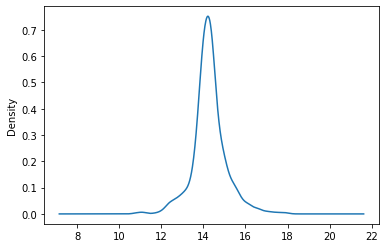

In [ ]:
s = ml_df['label']
ax = s.plot.kde()

So we decided to make binary classification insead of numerical numbers. We make the natural log view count that's above 14.2 (get from the above graph, about 1468864 views in normal number) to be "high (1)" and below 14.2 to be "low (0)". 

In [ ]:
ml_df['label'] = ml_df['label'].apply(lambda x: 1 if x>=14.2 else 0)
ml_df

,number_of_speakers,speaker_is_published,is_talk_featured,has_talk_citation,number_of_tags,is_subtitle_required,number_of_subtitled_videos,number_of_talk_download_languages,number_of_related_talks,intro_duration,ad_duration,post_ad_duration,talks_player_talks_resources_h264_00_bitrate,label,comment_count_log,duration_log,desc_len,title_len,transcript_len,speak_speed,gap_months,published_weekday_1,published_weekday_2,published_weekday_3,published_weekday_4,published_weekday_5,published_weekday_6,published_weekday_7,language_en,language_es,language_fr,native_language_ar,native_language_de,native_language_en,native_language_es,native_language_fr,native_language_hi,native_language_it,native_language_ja,native_language_ko,...,published_year_2017,published_year_2018,published_year_2019,published_year_2020,published_month_1,published_month_2,published_month_3,published_month_4,published_month_5,published_month_6,published_month_7,published_month_8,published_month_9,published_month_10,published_month_11,published_month_12,published_hour_0,published_hour_1,published_hour_2,published_hour_3,published_hour_4,published_hour_5,published_hour_6,published_hour_7,published_hour_8,published_hour_9,published_hour_10,published_hour_11,published_hour_12,published_hour_13,published_hour_14,published_hour_15,published_hour_16,published_hour_17,published_hour_18,published_hour_19,published_hour_20,published_hour_21,published_hour_22,published_hour_23
talk_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
66,1,True,True,0.0,7,False,61,62,6,11.82,3.33,0.83,180.0,1,8.507749,7.060476,21,4,3066.0,2.63,4.066667,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2405,1,True,True,0.0,5,False,47,47,6,11.82,3.33,0.83,180.0,1,5.666427,6.378426,62,10,1180.0,2.01,1.033333,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1569,1,True,True,0.0,7,False,50,51,6,11.82,3.33,0.83,180.0,1,7.882315,7.141245,90,8,3602.0,2.85,3.233333,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
848,1,True,True,0.0,5,False,47,48,6,11.82,3.33,0.83,180.0,1,7.646831,6.989335,35,5,2987.0,2.76,7.633333,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1042,1,True,True,0.0,9,False,51,52,6,11.82,3.33,0.83,180.0,1,7.711997,7.106606,46,4,3046.0,2.50,6.666667,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63813,3,True,True,0.0,9,False,1,1,6,11.82,3.33,0.83,180.0,0,1.945910,6.822197,126,10,2229.0,2.43,0.500000,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
63852,1,True,True,1.0,6,False,1,1,6,11.82,3.33,0.83,180.0,0,2.639057,6.823286,74,6,2328.0,2.54,6.766667,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
64548,1,True,True,1.0,6,False,1,1,6,11.82,3.33,0.83,180.0,0,2.833213,5.843544,76,9,778.0,2.26,0.033333,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# split into x and y
label = ml_df['label']
features = ml_df.loc[:, ml_df.columns != 'label']

Split the data for training.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1641, 93)
(1641,)


## Logistic Regression

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_mse_test = np.sqrt(mean_squared_error(y_test, lr_y_pred))
lr_accuracy = metrics.accuracy_score(y_test, lr_y_pred)

The accuracy and MSE of Orig-LR:

In [ ]:
print ("Accuracy: ", lr_accuracy)
print("Mean Squared Error: ", lr_mse_test)

Accuracy:  0.781021897810219
Mean Squared Error:  0.46795096130874764


Print the classification report.

In [ ]:
print(metrics.classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       202
           1       0.76      0.82      0.79       209

    accuracy                           0.78       411
   macro avg       0.78      0.78      0.78       411
weighted avg       0.78      0.78      0.78       411



In [ ]:
lr_cm = metrics.confusion_matrix(y_test, lr_y_pred)
lr_cm

array([[149,  53],
       [ 37, 172]])

Confusion map of Orig-LR:

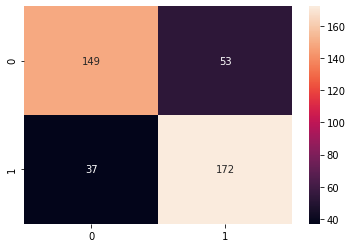

In [ ]:
labels = np.array(lr_cm.tolist())
sns.heatmap(lr_cm, annot=labels, fmt = '')
plt.show()

The AUC plot and ROC score are shown below.

In [ ]:
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, y_pred_prob_lr)

0.8643706475910748

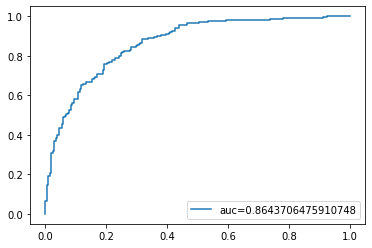

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob_lr)
auc = metrics.roc_auc_score(y_test, y_pred_prob_lr)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

The below bar plot is the top 15 most important features for Orig-LR model. We can see that year 2019 is the most important features in predicting the views and comment_log and duration are also important.

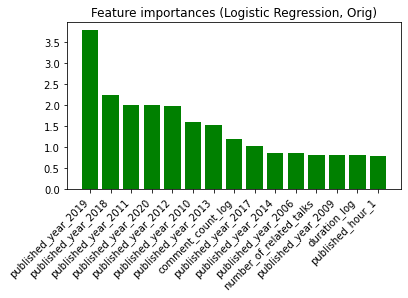

In [ ]:
coefs = np.abs(lr_model.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (Logistic Regression, Orig)")
plt.bar(range(15), coefs[indices[:15]],
       color="g", align="center")
plt.xticks(range(15), features.columns[indices[:15]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

In summary, we did a pretty good job using the logistic regression model on the original dataframe. The ROC-AUC score is 0.86, and the accuracy of the model is around 0.78, with a small MSE. The confusion matrix also indicates that our data is pretty balanced.

## Random Forest

We then tried random forest classifier on the original dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [200],
              'max_depth': [5,10,15,20]}

grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 15, 'n_estimators': 200}


In [ ]:
rf_model = RandomForestClassifier(n_estimators=200,max_depth=15)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test, y_pred_rf)
rf_mse_test = mean_squared_error(y_test, y_pred_rf)

The accuracy and MSE of Orig-RF:

In [ ]:
print ("Accuracy: ", rf_accuracy)
print("Mean Squared Error: ", rf_mse_test)

Accuracy:  0.7688564476885644
Mean Squared Error:  0.23114355231143552


Print the classifiation report of Orig-RF:

In [ ]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74       201
           1       0.73      0.86      0.79       210

    accuracy                           0.77       411
   macro avg       0.78      0.77      0.77       411
weighted avg       0.78      0.77      0.77       411



The confusion matrix of Orig-RF:

In [ ]:
rf_cm = metrics.confusion_matrix(y_test, y_pred_rf)
rf_cm

array([[136,  65],
       [ 30, 180]])

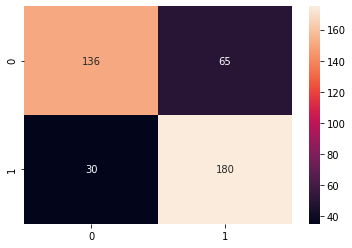

In [ ]:
labels = np.array(rf_cm.tolist())
sns.heatmap(lr_cm, annot=labels, fmt = '')
plt.show()

The ROC-AUC score and the AUC plot of Orig-RF:

In [ ]:
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, y_pred_prob_rf)

0.8402748163942193

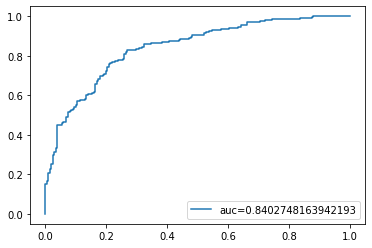

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob_rf)
auc = metrics.roc_auc_score(y_test, y_pred_prob_rf)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

The top 15 features show that `comment_count_log` is the most important feature in the Orig-RF model.

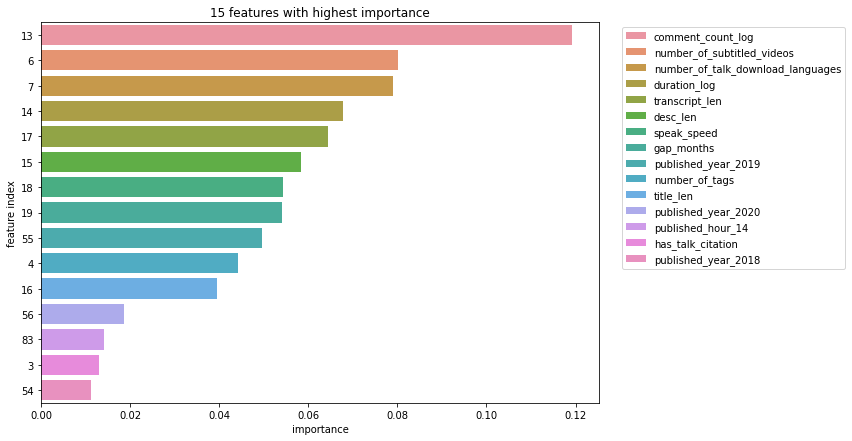

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
# index of 15 highest importance features
indices = np.argsort(importances)[::-1][:15]
plt.figure(figsize=(10,7))
sns.barplot(y = indices.astype(str), x = importances[indices], hue = [features[i] for i in indices],dodge= False)
plt.legend(loc = "upper right",bbox_to_anchor=(1.45, 1) )
plt.xlabel("importance")
plt.ylabel("feature index")
plt.title("15 features with highest importance")
plt.show()

In summary, the Orig-RF model has a very similar performance to the Orig-LR model. The importance features are different, but the accuracy and MSE are very similar.

##Deep Learning Models

Then, we conduct a deep learning model on the original data.

In [ ]:
#convert the dataframe to numpy dataset
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.metrics import confusion_matrix
X_train_tf = X_train.astype(np.float32).values
y_train_tf = y_train.astype(np.int64).values
X_test_tf = X_test.astype(np.float32).values
y_test_tf = y_test.astype(np.int64).values

In [ ]:
#make the tensor slices
print(X_train_tf.shape)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train_tf))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tf, y_test_tf))

(1641, 93)


In [ ]:
#Shuffle the dataset using the BATCH_size and SHUFFLE_BUFFER_SIZE
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
#Construct the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(93, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
model.fit(train_dataset, epochs=128)

Epoch 1/128
26/26 [==============================] - 0s 2ms/step - loss: 29.1918 - sparse_categorical_accuracy: 0.5253
Epoch 2/128
26/26 [==============================] - 0s 1ms/step - loss: 16.2395 - sparse_categorical_accuracy: 0.4869
Epoch 3/128
26/26 [==============================] - 0s 2ms/step - loss: 13.2451 - sparse_categorical_accuracy: 0.5125
Epoch 4/128
26/26 [==============================] - 0s 1ms/step - loss: 10.1334 - sparse_categorical_accuracy: 0.5314
Epoch 5/128
26/26 [==============================] - 0s 2ms/step - loss: 8.2066 - sparse_categorical_accuracy: 0.5289
Epoch 6/128
26/26 [==============================] - 0s 1ms/step - loss: 6.2413 - sparse_categorical_accuracy: 0.5253
Epoch 7/128
26/26 [==============================] - 0s 1ms/step - loss: 4.9431 - sparse_categorical_accuracy: 0.5149
Epoch 8/128
26/26 [==============================] - 0s 1ms/step - loss: 4.0624 - sparse_categorical_accuracy: 0.5350
Epoch 9/128
26/26 [==============================] -

In [ ]:
model.evaluate(test_dataset)

7/7 [==============================] - 0s 1ms/step - loss: 0.5871 - sparse_categorical_accuracy: 0.6837


[0.5871376991271973, 0.683698296546936]

In [ ]:
y_pred_dl = model.predict(test_dataset)
y_pred_dl = np.argmax(y_pred_dl, axis=1)

In [ ]:
print(metrics.classification_report(y_test, y_pred_dl))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64       193
           1       0.68      0.75      0.72       218

    accuracy                           0.68       411
   macro avg       0.68      0.68      0.68       411
weighted avg       0.68      0.68      0.68       411



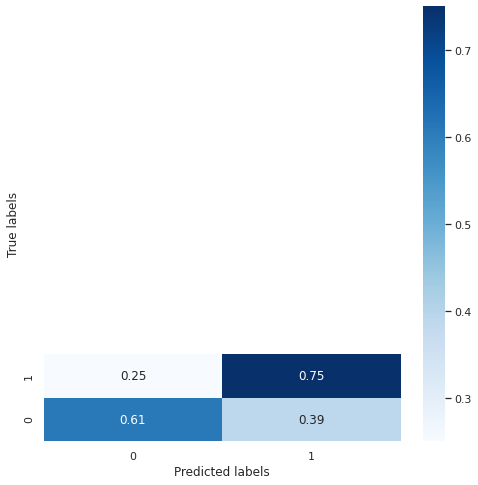

In [ ]:
con_mat = confusion_matrix(y_test, y_pred_dl)
con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]     
con_mat_norm = np.around(con_mat_norm, decimals=2)
plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')
plt.ylim(0, 10)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

So we get the conclusion  that the accuracy of deep learning is lower than Logistic Regression and Random Forest. This is because that our dataset is too small to use deep learning. 

We then put the three models on the original-wikipedia joined dataframe to see if the wikipedia page length is an important feature when predicting the views.

# Section 6 - Modeling: Orig + Wiki

In [ ]:
ml_df = wiki_orig_df_cleaned.copy()
ml_df.rename(columns = {'view_count_log':'label'}, inplace = True) 
ml_df

,number_of_speakers,speaker_is_published,is_talk_featured,has_talk_citation,number_of_tags,is_subtitle_required,number_of_subtitled_videos,number_of_talk_download_languages,number_of_related_talks,intro_duration,ad_duration,post_ad_duration,talks_player_talks_resources_h264_00_bitrate,label,comment_count_log,duration_log,desc_len,title_len,transcript_len,speak_speed,gap_months,length,published_weekday_1,published_weekday_2,published_weekday_3,published_weekday_4,published_weekday_5,published_weekday_6,published_weekday_7,language_en,native_language_de,native_language_en,native_language_zh-cn,published_year_2006,published_year_2007,published_year_2008,published_year_2009,published_year_2010,published_year_2011,published_year_2012,...,published_year_2017,published_year_2018,published_year_2019,published_year_2020,published_month_1,published_month_2,published_month_3,published_month_4,published_month_5,published_month_6,published_month_7,published_month_8,published_month_9,published_month_10,published_month_11,published_month_12,published_hour_0,published_hour_1,published_hour_2,published_hour_3,published_hour_4,published_hour_5,published_hour_6,published_hour_7,published_hour_8,published_hour_9,published_hour_10,published_hour_11,published_hour_12,published_hour_13,published_hour_14,published_hour_15,published_hour_16,published_hour_17,published_hour_18,published_hour_19,published_hour_20,published_hour_21,published_hour_22,published_hour_23
0,1,True,True,0.0,7,False,61,62,6,11.82,3.33,0.83,180.0,18.000286,8.507749,7.060476,21,4,3066.0,2.63,4.066667,7238,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,True,True,0.0,4,False,42,43,6,11.82,3.33,0.83,180.0,16.135910,6.501290,7.049255,54,6,2643.0,2.30,0.566667,7238,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,True,True,0.0,4,False,56,58,6,11.82,3.33,0.83,180.0,16.056724,7.154615,6.916715,35,5,2537.0,2.52,3.566667,7238,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,True,True,0.0,5,False,47,47,6,11.82,3.33,0.83,180.0,17.905269,5.666427,6.378426,62,10,1180.0,2.01,1.033333,2812,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,1,True,True,0.0,5,False,40,40,6,11.82,3.33,0.83,180.0,16.945279,4.369448,6.133398,50,6,891.0,1.94,2.166667,2812,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,1,True,True,0.0,10,False,20,20,6,11.82,3.33,0.83,180.0,13.047010,4.094345,7.338888,23,7,3862.0,2.51,4.966667,6837,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1273,1,True,True,0.0,5,False,20,20,6,11.82,3.33,0.83,180.0,13.045193,3.091042,6.818924,40,6,2103.0,2.30,134.233333,6643,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1278,1,True,True,0.0,7,False,22,22,6,11.82,3.33,0.83,180.0,12.974610,3.433987,6.595781,28,5,1923.0,2.63,44.800000,4124,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1280,1,True,True,0.0,7,False,23,23,6,11.82,3.33,0.83,180.0,12.957656,3.806662,6.883463,34,2,2809.0,2.88,57.266667,3454,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


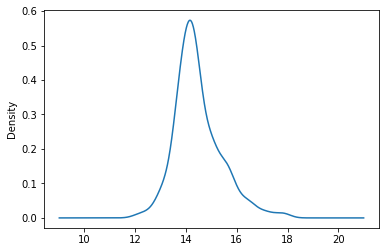

In [ ]:
s = ml_df['label']
ax = s.plot.kde()

In [ ]:
ml_df['label'] = ml_df['label'].apply(lambda x: 1 if x>=14.2 else 0)
ml_df

,number_of_speakers,speaker_is_published,is_talk_featured,has_talk_citation,number_of_tags,is_subtitle_required,number_of_subtitled_videos,number_of_talk_download_languages,number_of_related_talks,intro_duration,ad_duration,post_ad_duration,talks_player_talks_resources_h264_00_bitrate,label,comment_count_log,duration_log,desc_len,title_len,transcript_len,speak_speed,gap_months,length,published_weekday_1,published_weekday_2,published_weekday_3,published_weekday_4,published_weekday_5,published_weekday_6,published_weekday_7,language_en,native_language_de,native_language_en,native_language_zh-cn,published_year_2006,published_year_2007,published_year_2008,published_year_2009,published_year_2010,published_year_2011,published_year_2012,...,published_year_2017,published_year_2018,published_year_2019,published_year_2020,published_month_1,published_month_2,published_month_3,published_month_4,published_month_5,published_month_6,published_month_7,published_month_8,published_month_9,published_month_10,published_month_11,published_month_12,published_hour_0,published_hour_1,published_hour_2,published_hour_3,published_hour_4,published_hour_5,published_hour_6,published_hour_7,published_hour_8,published_hour_9,published_hour_10,published_hour_11,published_hour_12,published_hour_13,published_hour_14,published_hour_15,published_hour_16,published_hour_17,published_hour_18,published_hour_19,published_hour_20,published_hour_21,published_hour_22,published_hour_23
0,1,True,True,0.0,7,False,61,62,6,11.82,3.33,0.83,180.0,1,8.507749,7.060476,21,4,3066.0,2.63,4.066667,7238,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,True,True,0.0,4,False,42,43,6,11.82,3.33,0.83,180.0,1,6.501290,7.049255,54,6,2643.0,2.30,0.566667,7238,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,True,True,0.0,4,False,56,58,6,11.82,3.33,0.83,180.0,1,7.154615,6.916715,35,5,2537.0,2.52,3.566667,7238,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,True,True,0.0,5,False,47,47,6,11.82,3.33,0.83,180.0,1,5.666427,6.378426,62,10,1180.0,2.01,1.033333,2812,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,1,True,True,0.0,5,False,40,40,6,11.82,3.33,0.83,180.0,1,4.369448,6.133398,50,6,891.0,1.94,2.166667,2812,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,1,True,True,0.0,10,False,20,20,6,11.82,3.33,0.83,180.0,0,4.094345,7.338888,23,7,3862.0,2.51,4.966667,6837,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1273,1,True,True,0.0,5,False,20,20,6,11.82,3.33,0.83,180.0,0,3.091042,6.818924,40,6,2103.0,2.30,134.233333,6643,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1278,1,True,True,0.0,7,False,22,22,6,11.82,3.33,0.83,180.0,0,3.433987,6.595781,28,5,1923.0,2.63,44.800000,4124,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1280,1,True,True,0.0,7,False,23,23,6,11.82,3.33,0.83,180.0,0,3.806662,6.883463,34,2,2809.0,2.88,57.266667,3454,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# split into x and y
label = ml_df['label']
features = ml_df.loc[:, ml_df.columns != 'label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

## Logistic Regression

In [ ]:
lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_mse_test = np.sqrt(mean_squared_error(y_test, lr_y_pred))
lr_accuracy = metrics.accuracy_score(y_test, lr_y_pred)

The accuracy and MSE of Orig+Wiki-LR model:

In [ ]:
print ("Accuracy: ", lr_accuracy)
print("Mean Squared Error: ", lr_mse_test)

Accuracy:  0.7372881355932204
Mean Squared Error:  0.5125542550860149


Print the classification report of the Orig+Wiki-LR model:

In [ ]:
print(metrics.classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70        53
           1       0.75      0.78      0.77        65

    accuracy                           0.74       118
   macro avg       0.73      0.73      0.73       118
weighted avg       0.74      0.74      0.74       118



The confusion matrix of the Orig+Wiki-LR model:

In [ ]:
lr_cm = metrics.confusion_matrix(y_test, lr_y_pred)
lr_cm

array([[36, 17],
       [14, 51]])

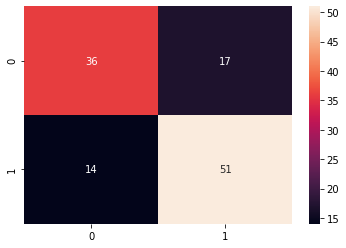

In [ ]:
labels = np.array(lr_cm.tolist())
sns.heatmap(lr_cm,annot=labels, fmt = '')
plt.show()

The ROC-AUC score and the AUC plot is shown below:

In [ ]:
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, y_pred_prob_lr)

0.8084179970972425

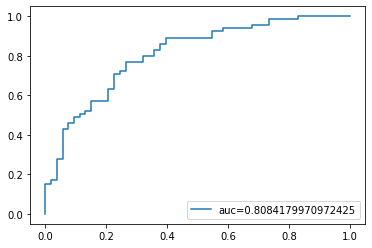

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob_lr)
auc = metrics.roc_auc_score(y_test, y_pred_prob_lr)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

Top 15 features of the Orig+Wiki-LR model show that year 2019 is also the most important features, which is the same as the Orig-LR model. Other important features include duration, comment, speak speed, has_talk_citation, etc.

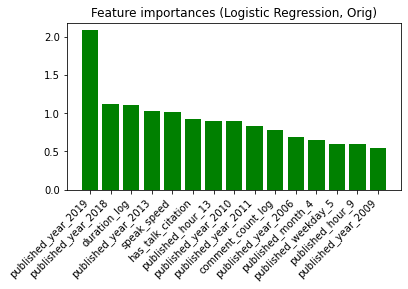

In [ ]:
coefs = np.abs(lr_model.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (Logistic Regression, Orig)")
plt.bar(range(15), coefs[indices[:15]],
       color="g", align="center")
plt.xticks(range(15), features.columns[indices[:15]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

In summary, the Orig+Wiki-LR model did a not so bad job with accuracy around 0.74, though it's not as robust as the Orig-LR model.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators': [200],
              'max_depth': [5,10,15,20]}

grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200,max_depth=10)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test, y_pred_rf)
rf_mse_test = mean_squared_error(y_test, y_pred_rf)

The accuracy and MSE of the Orig+Wiki-RF model:

In [ ]:
print ("Accuracy: ", rf_accuracy)
print("Mean Squared Error: ", rf_mse_test)

Accuracy:  0.7372881355932204
Mean Squared Error:  0.2627118644067797


Print the classification report of the Orig+Wiki-RF model:

In [ ]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67        53
           1       0.72      0.85      0.78        65

    accuracy                           0.74       118
   macro avg       0.74      0.72      0.73       118
weighted avg       0.74      0.74      0.73       118



The confusion matrix of the Orig+Wiki-RF model:

In [ ]:
rf_cm = metrics.confusion_matrix(y_test, y_pred_rf)
rf_cm

array([[32, 21],
       [10, 55]])

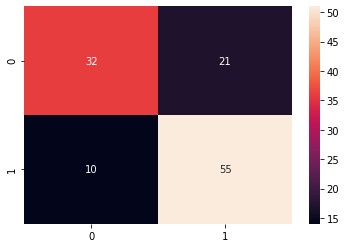

In [ ]:
labels = np.array(rf_cm.tolist())
sns.heatmap(lr_cm, annot=labels, fmt = '')
plt.show()

The ROC-AUC score and the AUC plot of the Orig+Wiki-RF model is shown below:

In [ ]:
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, y_pred_prob_rf)

0.839477503628447

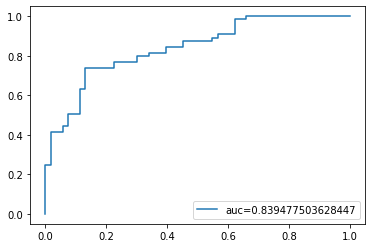

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob_rf)
auc = metrics.roc_auc_score(y_test, y_pred_prob_rf)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

Top 15 features of the Orig+Wiki-RF model indicates that `comment_count_log` is the most important feature. This is the same as what the Orig-RF model tells us. Also note that the wikipedia page length is also an important feature. Other important features include duration, transcript length, gap month, speak_speed etc.

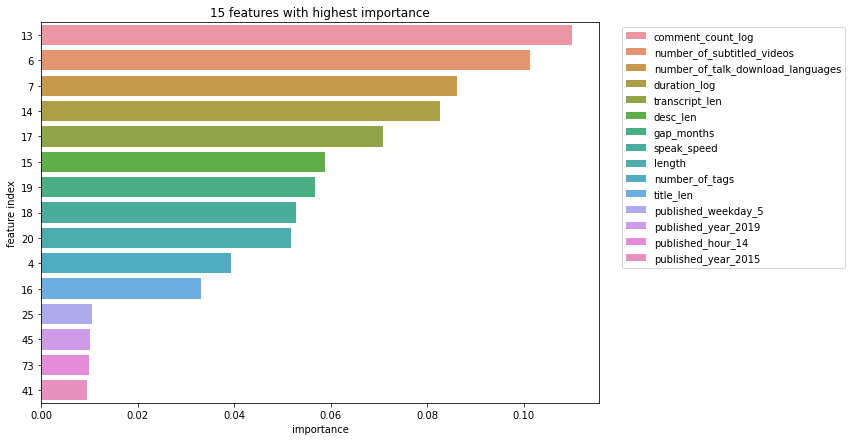

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
# index of 15 highest importance features
indices = np.argsort(importances)[::-1][:15]
plt.figure(figsize=(10,7))
sns.barplot(y = indices.astype(str), x = importances[indices], hue = [features[i] for i in indices],dodge= False)
plt.legend(loc = "upper right",bbox_to_anchor=(1.45, 1) )
plt.xlabel("importance")
plt.ylabel("feature index")
plt.title("15 features with highest importance")
plt.show()

In summary, the Orig+Wiki-RF model has a very similar performance as the Orig+Wiki-LR model, and they are both less robust than using just the original dataframe.

##Deep Learning Models

In [ ]:
#convert the dataframe to numpy dataset
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.metrics import confusion_matrix
X_train_tf = X_train.astype(np.float32).values
y_train_tf = y_train.astype(np.int64).values
X_test_tf = X_test.astype(np.float32).values
y_test_tf = y_test.astype(np.int64).values

In [ ]:
#make the tensor slices
print(X_train_tf.shape)
print(y_train_tf)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train_tf))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tf, y_test_tf))
print(X_train)

(471, 83)
[1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0
 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1
 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1
 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0
 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0
 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1
 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1
 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0
 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1
 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0]
      number_of_speakers  ...  pub

In [ ]:
#Shuffle the dataset using the BATCH_size and SHUFFLE_BUFFER_SIZE
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
#Construct the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(93, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
model.fit(train_dataset, epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 204.3254 - sparse_categorical_accuracy: 0.5329
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 101.9154 - sparse_categorical_accuracy: 0.4904
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 80.5778 - sparse_categorical_accuracy: 0.4926
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 96.1896 - sparse_categorical_accuracy: 0.4628
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 56.1496 - sparse_categorical_accuracy: 0.4820
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 53.1046 - sparse_categorical_accuracy: 0.5478
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 64.8132 - sparse_categorical_accuracy: 0.4628
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 41.0692 - sparse_categorical_accuracy: 0.5372
Epoch 9/100
8/8 [==============================] - 0s 2ms/step

In [ ]:
model.evaluate(test_dataset)

2/2 [==============================] - 0s 3ms/step - loss: 0.7644 - sparse_categorical_accuracy: 0.5932


[0.7643783092498779, 0.5932203531265259]

In [ ]:
y_pred_dl = model.predict(test_dataset)
y_pred_dl = np.argmax(y_pred_dl, axis=1)

In [ ]:
print(metrics.classification_report(y_test, y_pred_dl))

              precision    recall  f1-score   support

           0       0.57      0.31      0.40        52
           1       0.60      0.82      0.69        66

    accuracy                           0.59       118
   macro avg       0.59      0.56      0.55       118
weighted avg       0.59      0.59      0.56       118



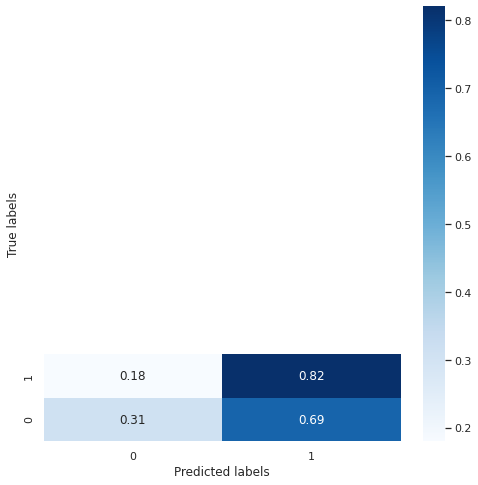

In [ ]:
con_mat = confusion_matrix(y_test, y_pred_dl)
con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]     
con_mat_norm = np.around(con_mat_norm, decimals=2)
plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')

plt.ylim(0, 10)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
clf_y_pred = clf.predict(X_test)
lr_mse_test = np.sqrt(mean_squared_error(y_test, lr_y_pred))
lr_accuracy = metrics.accuracy_score(y_test, lr_y_pred)
print(lr_accuracy)

0.7203389830508474


By using the deep learning models, like the feedforward model with input of 93 nodes and hidden layer of 128 and 64 nodes. Also, the output are the 2 softmax nodes. We find that the original df has the better performance than the df with wiki. One of the assumption is that the original one has more features than the df with wiki and the omitted features are those essential ones.

# Section 7 - Conclusion

> We analyzed the TED talk dataset from a data science point of view through conducting EDA of some interesting topics, processinbg the transcripts, scraping the speaker's wikipedia pages, etc. For the modeling part, we want to predict views using different machine learning models and to see what features affect the views the most.

> It seems that adding a wikipedia page component doesn't improve the performance; on the contratry, it weaken the accuracy of the models. Although the page length is one of the top 15 important features for the Orig+Wiki-RF model, it is not considered to be an important feature that will impact the result greatly. This could be due to two reasons: the first is that we have a much smaller dataset (1500+ rows fewer) after joining the Wikipedia datafram, and the second is that the wikipedia page length in general is not important. The audience might not check the speaker's website before watching the video, and thus a longer page is not a determining factor.

> Moreover, we found that the top 3 features that affect the views the most, comparing all models, are `published_year_2019`, `comment_views_log`, `duration`. Year 2019 has the most videos published, so the data from that year can be dominant. The number of comments of the video and the duration are also one of the greatest factor for the audience to take into consideration. Some other important features include: `speak_speed`, `transcript_length`, `gap_month`, `hour_9`, `hour_14`, `weekday_5` and so on. If the video is published on Friday, it might have a higher chance to be watched. 

> Lastly, another notible observation is that the deep learning model seems not to be suitable for this dataset, which is reasonable as it is not only small, but also not considered as unstructured data like images, video, sound or text. The logistic regression and the random forest model give very similar results, in terms of accuracy and ROC score.